<a href="https://colab.research.google.com/github/manassanant132/Fundamental-of-Deep-Learning/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.compat.v1 as tf
from tensorflow.python.framework.ops import disable_eager_execution

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split
from sklearn import metrics

import plotly
import plotly.graph_objs as go
import plotly.express as px

K = tf.keras.backend

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
disable_eager_execution()
tf.executing_eagerly()

False

In [ ]:
np.random.seed(seed=13) #กำหนด weight เริ่มต้นจะได้ไม่ต้องสุ่ม
EPOCH=500 #เรียน500รอบ

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/weather/weather.csv") #ดึงชุดข้อมูล
dataset.shape #ดูขนาดของชุดข้อมูล

(366, 22)

In [ ]:
dataset.describe() #ดูชุดข้อมูล

MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.000000    13.000000   
25%        31.000000      6.000000     11.000000    64.000000    32.250000   
50%        39.000000      7.000000     17.000000    72.000000    43.000000   
75%        46.000000     13.000000     24.000000    81.000000    55.000000   
max        98.000000     41.000000     52.000000    99.000000    96.000000   

       Pressure9am  Pressure3pm    Cloud9am    Cloud3pm     Temp9am  \
count   366.000000   366.000000  366.000000  366.000000  366.000000   
mean   1019.709016  1016.810383    3.890710    4.024590   12.358470   
std       6.686212     6.469422    2.956131    2.666268    5.630832   
min     996.500000   996.800000    0.000000    0.000000    0.100000   
25%    1015.350000  1012.800000    1.000000    1.000000    7.625000   
50%    1020.150000  1017.400000    3.500000    4.000000   12.550000   
75%    1024.475000  1021.475000    7.000000    7.000000   17.000000   
max    1035.700000  1033.200000    8.000000    8.000000   24.700000   

          Temp3pm     RISK_MM  
count  366.000000  366.000000  
mean    19.230874    1.428415  
std      6.640346    4.225800  
min      5.100000    0.000000  
25%     14.150000    0.000000  
50%     18.550000    0.000000  
75%     24.000000    0.200000  
max     34.500000   39.800000

Text(0, 0.5, 'MaxTemp')

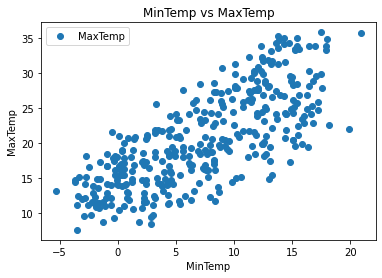

In [ ]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o') #กำหนดแกนxและแกนyของgraph
plt.title('MinTemp vs MaxTemp')  #กำหนดหัวเรื่อง
plt.xlabel('MinTemp') #กำหนดชื่อแนวแกนy
plt.ylabel('MaxTemp') #กำหนดชื่อแนวแกนx
#plt.savefig('min_max_temp.jpeg', dpi=300)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


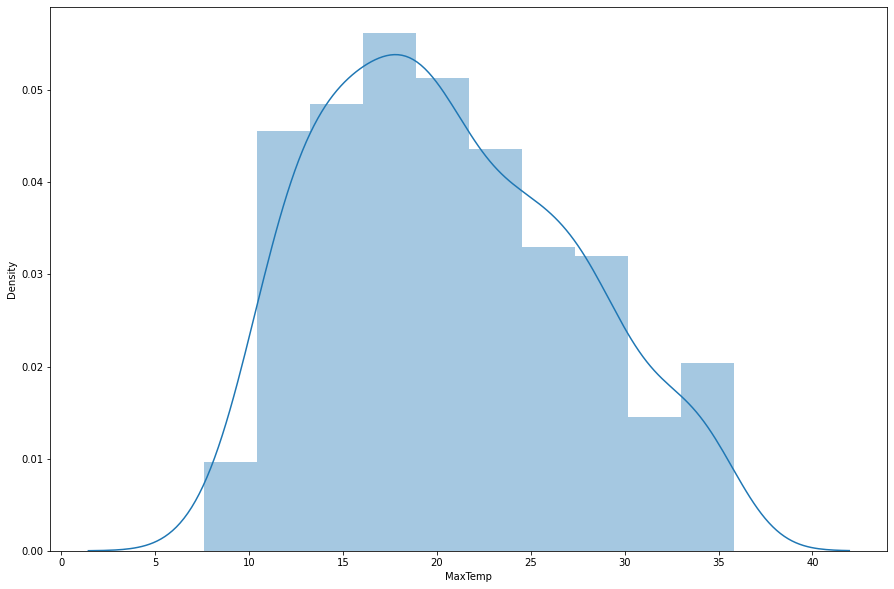

In [ ]:
plt.figure(figsize=(15,10)) #
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])
#plt.savefig('dis_max_temp.jpeg', dpi=300)

In [ ]:
x = dataset['MinTemp'].values.reshape(-1,1) #เปลี่ยนขนาดของชุดข้อมูล
y = dataset['MaxTemp'].values.reshape(-1,1) #เปลี่ยนขนาดของชุดข้อมูล

x.shape #ดูรูปร้างของชุดข้อมูล

(366, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle= True,random_state=4) #แบ่งชุดเป็น2ชุด

x_train.shape, x_test.shape, y_train.shape, y_test.shape #ดูรูปร่างของชุดข้อมูล

((292, 1), (74, 1), (292, 1), (74, 1))

In [ ]:
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0)) #random weight
b = tf.Variable(tf.random.uniform([1], -1.0, 1.0)) #random bias

y = W * x_train + b #สมการ

In [ ]:
loss = tf.reduce_mean(tf.square(y - y_train)) #หาloss

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(0.0001) #learning rate

train = optimizer.minimize(loss) #ปรับค่า learning rate ตาม loss

In [ ]:
init = tf.global_variables_initializer()#ตั้งคำสั้งใช้function

In [ ]:
sess = tf.Session()
sess.run(init)

In [ ]:
history = [] #กำหนดเซ็ต history
wb = [] #กำหนดเซ็ต wb
for step in range(EPOCH): #วิ่งตามจำนวน epoch
    sess.run(train) # tain
    history.append(sess.run(loss)) #ใส่ค่า loss ลงไปใน set
    print(step, sess.run(W), sess.run(b), sess.run(loss)) #เขียน W b loss ออกมา
    wb.append([sess.run(W)[0], sess.run(b)[0], sess.run(loss)]) #เพิ่มค้า W b loss ลงไปใน wb

0 [0.67265296] [0.04622139] 258.35492
1 [0.6954055] [0.04931429] 253.12834
2 [0.7177595] [0.05237463] 248.08192
3 [0.73972195] [0.05540298] 243.20947
4 [0.76129967] [0.05839989] 238.50494
5 [0.7824994] [0.06136591] 233.96251
6 [0.8033276] [0.06430157] 229.57657
7 [0.8237909] [0.06720741] 225.3418
8 [0.8438956] [0.07008394] 221.25291
9 [0.863648] [0.07293167] 217.30486
10 [0.8830542] [0.0757511] 213.49274
11 [0.90212023] [0.07854273] 209.8119
12 [0.92085207] [0.08130703] 206.25781
13 [0.9392555] [0.08404449] 202.82605
14 [0.95733625] [0.08675556] 199.51242
15 [0.9751] [0.0894407] 196.31284
16 [0.9925522] [0.09210037] 193.22336
17 [1.0096984] [0.09473501] 190.24014
18 [1.0265437] [0.09734505] 187.35954
19 [1.0430937] [0.09993093] 184.578
20 [1.0593532] [0.10249305] 181.89212
21 [1.0753275] [0.10503183] 179.29855
22 [1.0910215] [0.10754769] 176.79414
23 [1.1064401] [0.110041] 174.37581
24 [1.121588] [0.11251217] 172.04054
25 [1.1364701] [0.11496158] 169.78549
26 [1.1510909] [0.11738961] 1

In [ ]:
M = sess.run(W) #กำหนดค่า W เป็น M
C = sess.run(b) #กำหนดค่า b เป็น c

In [ ]:
def predict(X, M, C): #ทำ function ขื่อ predict
    y = (M*X)+C #สมการเส้นตรง
    return y #แสดงค่า y ออกมาเป็นคำตอบ

In [ ]:
df = pd.DataFrame(history, columns=['loss']) #สร้างตาราง ?

In [ ]:
h1 = go.Scatter(y=df['loss'], 
                    mode="lines",
                    line=dict(
                    	width=2,
                    	color='blue'),
                    name="loss") 

data = [h1]

layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='Epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data, layout=layout1)
plotly.offline.iplot(fig1) #สร้าง graph loss?

In [ ]:
y_pred = [predict(i, M, C) for i in x_test] #ทำนาย max temperature

y_test.shape

(74, 1)

In [ ]:
y_test = y_test.reshape(-1)
y_test.shape

(74,)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #แสดลงผลการทำนาย
df.head(10)


Actual             Predicted
0    20.6  [3.4621981263160704]
1    26.2  [29.957121324539184]
2    20.3  [19.320473325252532]
3    31.2  [20.287441325187682]
4    16.9  [13.131878125667573]
5    27.4  [22.608164525032045]
6    23.4  [31.504270124435426]
7    15.5  [1.1414749264717101]
8    14.5  [3.0754109263420104]
9    21.8  [28.796759724617004]

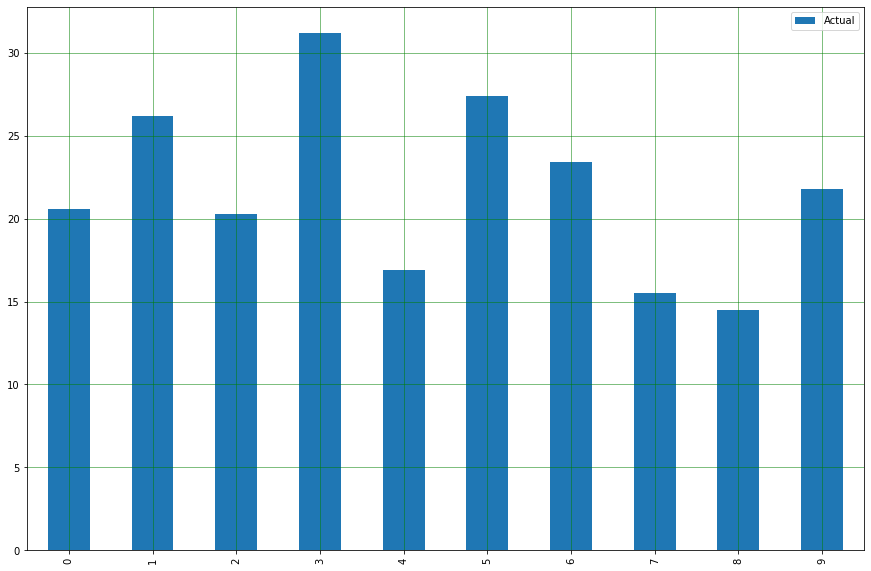

In [ ]:
df1 = df.head(10)
df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('actual-predict.jpeg', dpi=300) #plot graph เปรัยบเทียบระหว่า ค่าความจริงกับการทำนาย

In [ ]:
M = [i[0] for i in wb]
L = [i[2] for i in wb]
C = [i[1] for i in wb]

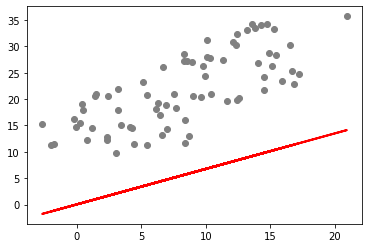

In [ ]:
y_pred = [predict(i, M[0], C[0]) for i in x_test] #show model epoch 1

plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.savefig('min_max_temp1.jpeg', dpi=300)

In [ ]:
len(M)


500

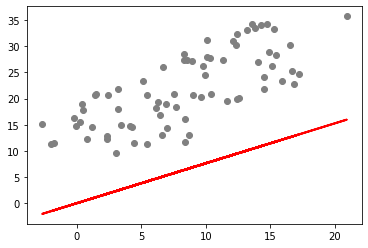

In [ ]:
y_pred = [predict(i, M[4], C[4]) for i in x_test] #show model epoch 5

plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.savefig('min_max_temp5.jpeg', dpi=300)

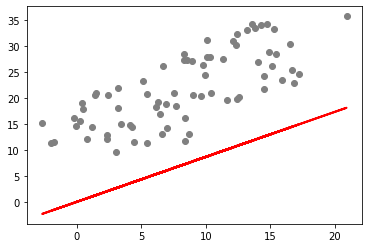

In [ ]:
y_pred = [predict(i, M[9], C[9]) for i in x_test] #show model epoch 10

plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.savefig('min_max_temp10.jpeg', dpi=300)

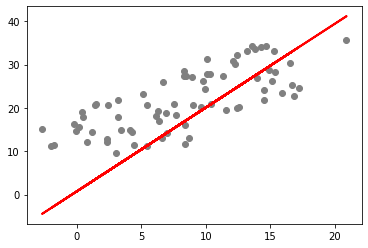

In [ ]:
y_pred = [predict(i, M[499], C[499]) for i in x_test] #show model epoch 500

plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.savefig('min_max_temp500.jpeg', dpi=300)

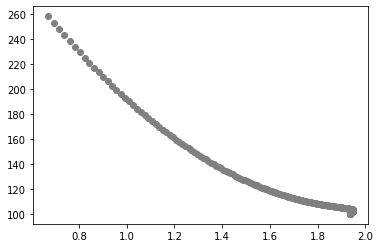

In [ ]:
plt.scatter(M, L,  color='gray') #ดู loss value เทียบค่ากับ bias
plt.savefig('weight.jpeg', dpi=300)

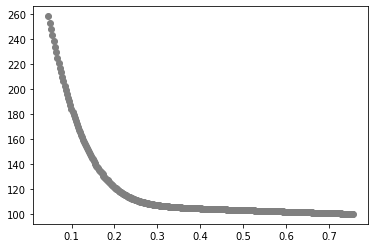

In [ ]:
plt.scatter(C, L, color='gray') #ดู loss value เทียบค่ากับ weight
plt.savefig('bias.jpeg', dpi=300)

In [ ]:
import plotly.express as px #ดู loss value เทียบค่ากับ weight,bias

df = pd.DataFrame({'W' : M, 'Bias' : C, 'Loss' : L})
fig = px.scatter_3d(df, x='W', y='Bias', z='Loss')
fig.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # วัดค่าความคลาดเคลื่ิอนของ model
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.475746425100275
Mean Squared Error: 79.25231634547154
Root Mean Squared Error: 8.902377005354893


In [ ]:
def rmse(y_true, y_pred): # ตั้ง function rmse(root mean square error)
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1, kernel_initializer='random_uniform', activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
SGD = tf.keras.optimizers.SGD
sgd = SGD(lr=0.0001)

model.compile(loss='mse', optimizer=sgd, metrics=['mae', 'mse', rmse]) #compile model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
history = model.fit(x_train, y_train, epochs=EPOCH, batch_size=64,  verbose=1, validation_split=0.2, shuffle=True) #แบ่งข้อมูลด้วยการสุ่ม(shuffle)

Train on 233 samples, validate on 59 samples
Epoch 1/500
233/233 [==============================] - 0s 451us/sample - loss: 438.0888 - mae: 19.9002 - mse: 438.0888 - rmse: 19.9002 - val_loss: 395.4569 - val_mae: 19.1113 - val_mse: 395.4569 - val_rmse: 19.1113
Epoch 2/500
233/233 [==============================] - 0s 102us/sample - loss: 394.8069 - mae: 18.9831 - mse: 394.8069 - rmse: 18.9831 - val_loss: 356.9913 - val_mae: 18.1817 - val_mse: 356.9913 - val_rmse: 18.1817
Epoch 3/500
233/233 [==============================] - 0s 96us/sample - loss: 356.8439 - mae: 18.1079 - mse: 356.8439 - rmse: 18.1079 - val_loss: 323.8708 - val_mae: 17.3227 - val_mse: 323.8708 - val_rmse: 17.3227
Epoch 4/500
233/233 [==============================] - 0s 78us/sample - loss: 324.2597 - mae: 17.3114 - mse: 324.2597 - rmse: 17.3114 - val_loss: 295.0871 - val_mae: 16.5216 - val_mse: 295.0871 - val_rmse: 16.5216
Epoch 5/500
233/233 [==============================] - 0s 132us/sample - loss: 295.9047 - mae: 16

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



233/233 [==============================] - 0s 151us/sample - loss: 270.9745 - mae: 15.8612 - mse: 270.9745 - rmse: 15.8612 - val_loss: 247.7219 - val_mae: 15.0578 - val_mse: 247.7219 - val_rmse: 15.0578
Epoch 7/500
233/233 [==============================] - 0s 95us/sample - loss: 249.3432 - mae: 15.1984 - mse: 249.3432 - rmse: 15.1984 - val_loss: 228.7294 - val_mae: 14.4033 - val_mse: 228.7294 - val_rmse: 14.4033
Epoch 8/500
233/233 [==============================] - 0s 95us/sample - loss: 230.5800 - mae: 14.5928 - mse: 230.5800 - rmse: 14.5928 - val_loss: 211.6918 - val_mae: 13.7721 - val_mse: 211.6918 - val_rmse: 13.7721
Epoch 9/500
233/233 [==============================] - 0s 81us/sample - loss: 213.8238 - mae: 14.0132 - mse: 213.8238 - rmse: 14.0132 - val_loss: 197.1445 - val_mae: 13.1922 - val_mse: 197.1445 - val_rmse: 13.1922
Epoch 10/500
233/233 [==============================] - 0s 86us/sample - loss: 199.4987 - mae: 13.4699 - mse: 199.4987 - rmse: 13.4699 - val_loss: 184.7183

In [ ]:
h1 = go.Scatter(y=history.history['loss'],  # plot loss,val loss
                    mode="lines",
                    line=dict(
                    	width=2,
                    	color='blue'),
                    name="loss")

h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines",
                    line=dict(
                    	width=2,
                    	color='green'),
                    name="val_loss")
                    
data = [h1, h2]

layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data, layout=layout1)
plotly.offline.iplot(fig1)

In [ ]:
y_pred = model.predict(x_test) # ทำนาย

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



In [ ]:
y_pred = y_pred.flatten()

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

Actual  Predicted
0    20.6   4.989623
1    26.2  29.667013
2    20.3  19.760033
3    31.2  20.660666
4    16.9  13.995970
5    27.4  22.822189
6    23.4  31.108027
7    15.5   2.828100
8    14.5   4.629369
9    21.8  28.586250

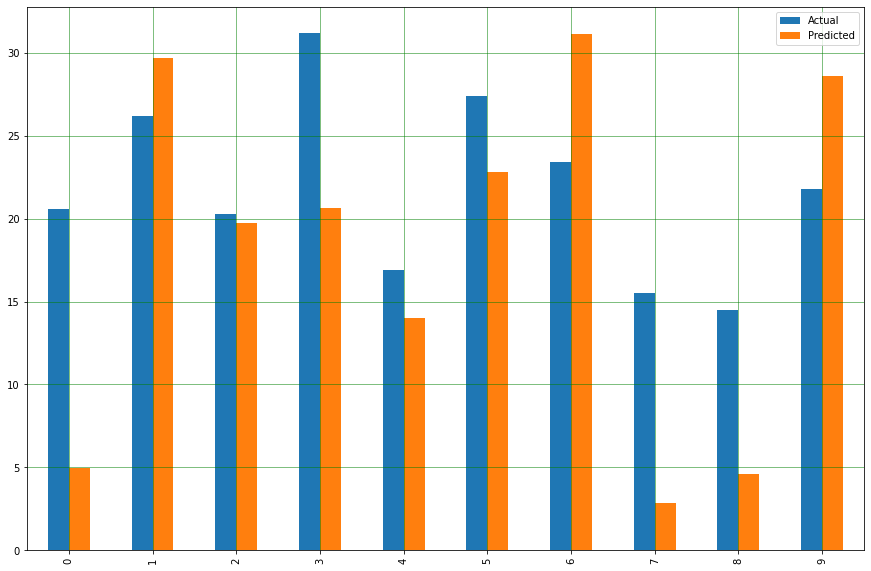

In [ ]:
df1 = df.head(10)
df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('actual-predict2.jpeg', dpi=300) # plot กราฟเปรียบเทียบผลการทำนายกับค่าจริง

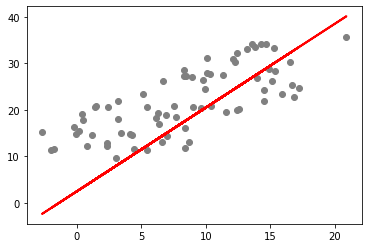

In [ ]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.savefig('keras_500_model.jpeg', dpi=300)

In [ ]:
x_test

array([[ 1.4],
       [15.1],
       [ 9.6],
       [10.1],
       [ 6.4],
       [11.3],
       [15.9],
       [ 0.2],
       [ 1.2],
       [14.5],
       [ 2.3],
       [15.4],
       [ 3.4],
       [ 0.8],
       [ 8.5],
       [16.7],
       [ 5.4],
       [12.3],
       [ 6.7],
       [14.9],
       [-2.7],
       [-0.1],
       [10.4],
       [ 8.3],
       [ 3.2],
       [ 5.1],
       [ 6.3],
       [ 8.3],
       [ 0.5],
       [11.6],
       [16.5],
       [13.6],
       [ 6.1],
       [12.4],
       [10.3],
       [ 9.9],
       [ 9. ],
       [20.9],
       [12.1],
       [15.3],
       [ 1.5],
       [16.8],
       [ 9.8],
       [-1.8],
       [ 7. ],
       [ 5.4],
       [14.3],
       [-2. ],
       [12.4],
       [ 3.2],
       [ 7.7],
       [ 4.4],
       [ 8.9],
       [ 8.7],
       [14. ],
       [-0.2],
       [ 7.5],
       [ 3. ],
       [14.7],
       [ 0.4],
       [13.2],
       [ 4.3],
       [14.5],
       [17.2],
       [13.8],
       [ 2.3],
       [10

In [ ]:
y_pred[0]

4.989623

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.852318237278912
Mean Squared Error: 65.69134302127422
Root Mean Squared Error: 8.105019618808718


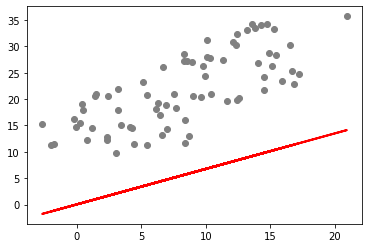

0


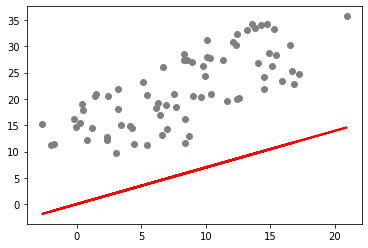

1


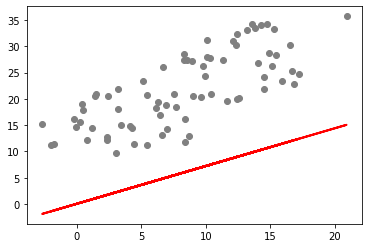

2


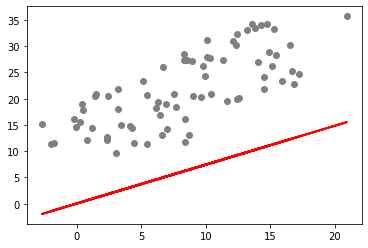

3


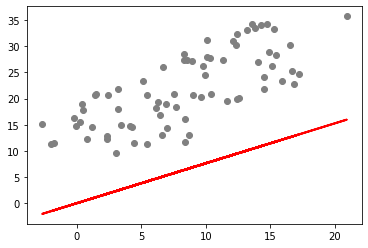

4


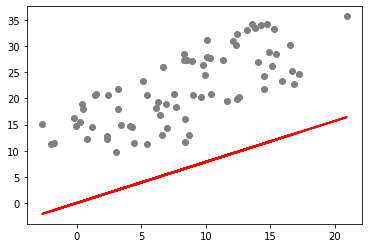

5


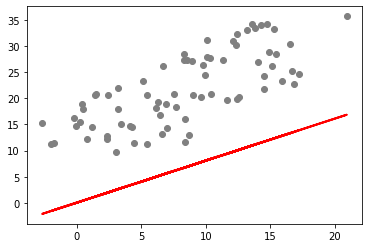

6


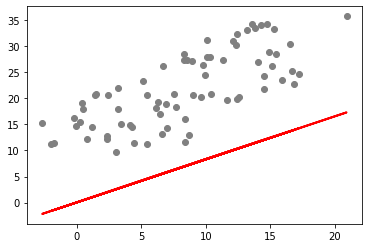

7


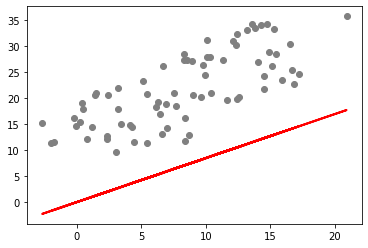

8


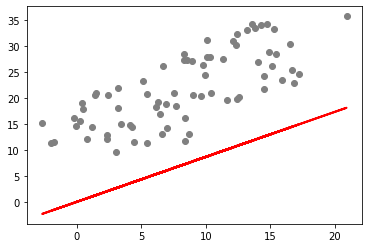

9


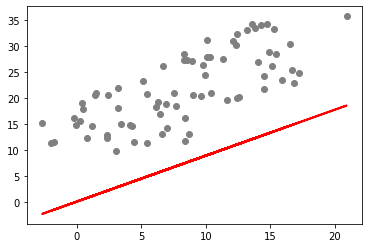

10


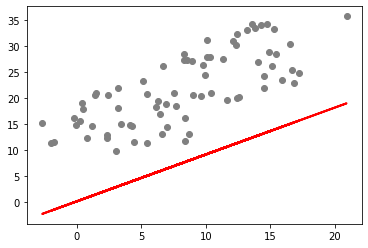

11


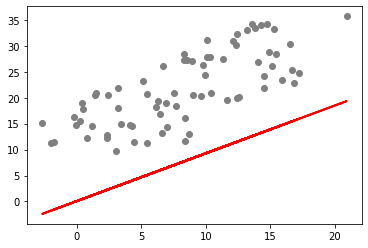

12


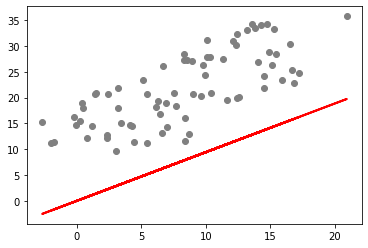

13


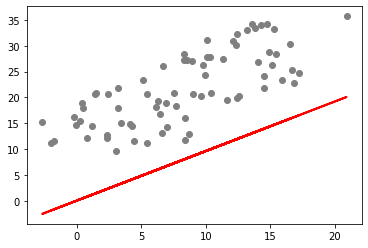

14


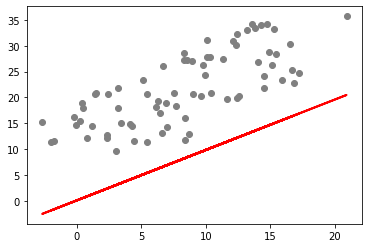

15


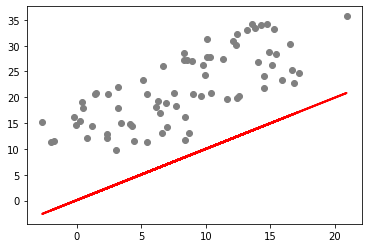

16


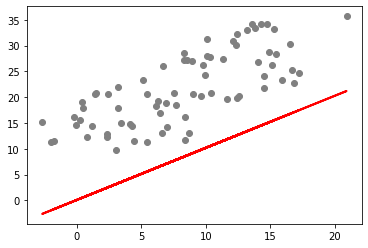

17


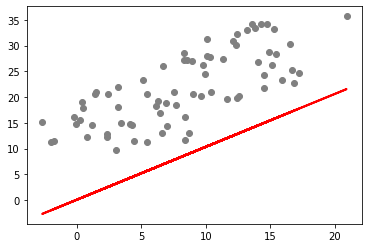

18


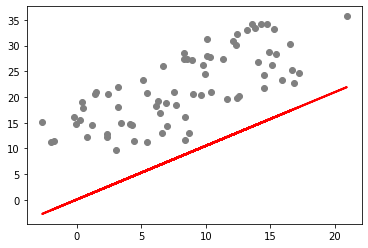

19


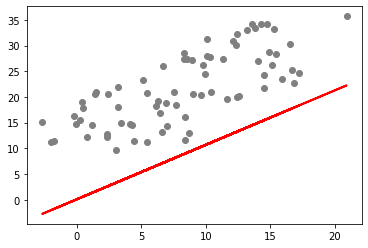

20


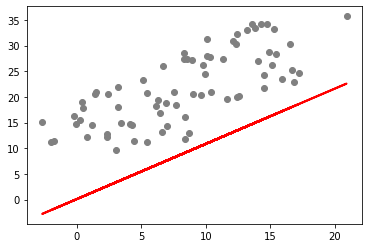

21


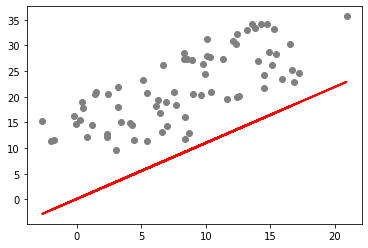

22


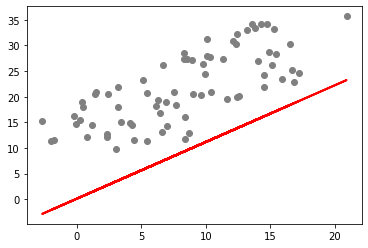

23


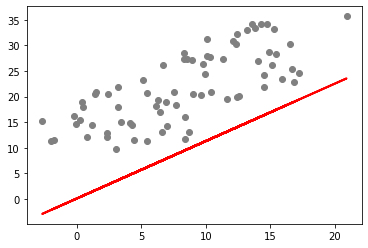

24


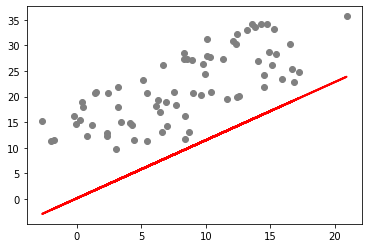

25


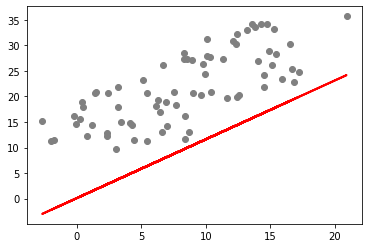

26


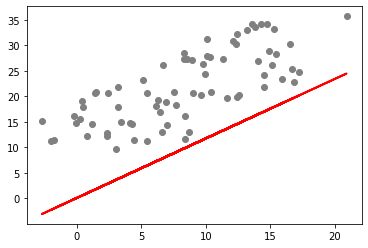

27


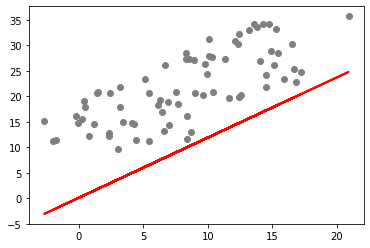

28


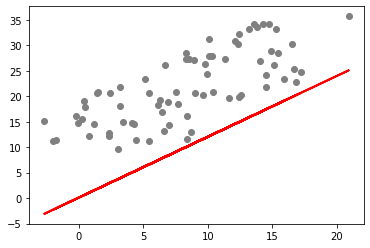

29


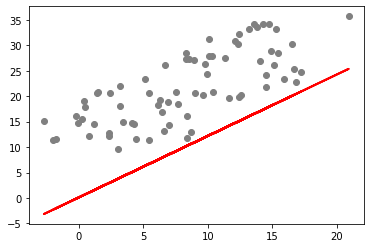

30


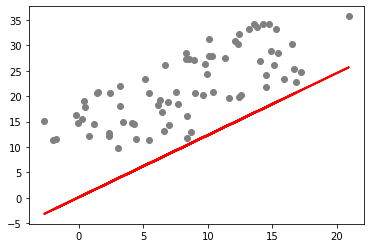

31


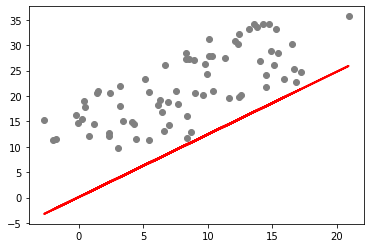

32


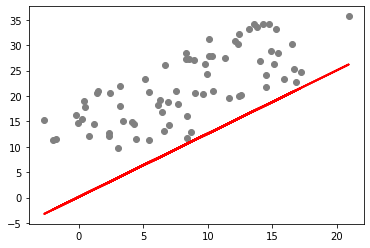

33


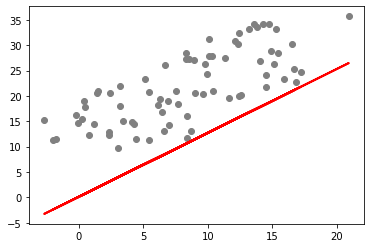

34


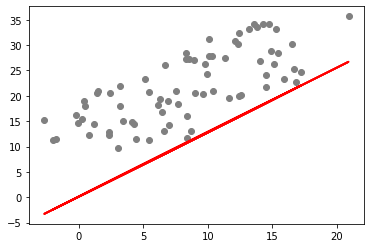

35


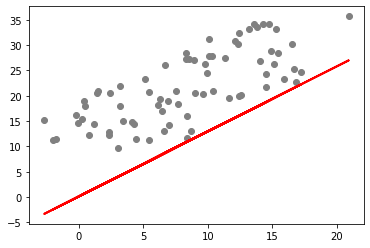

36


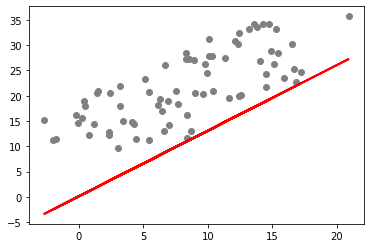

37


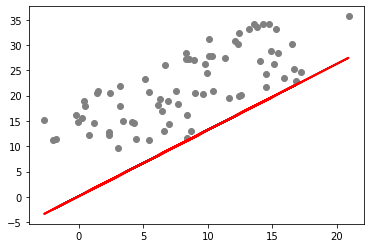

38


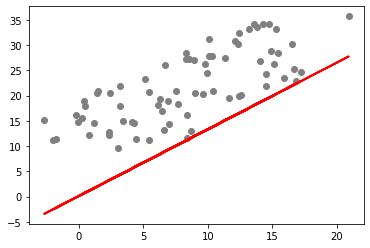

39


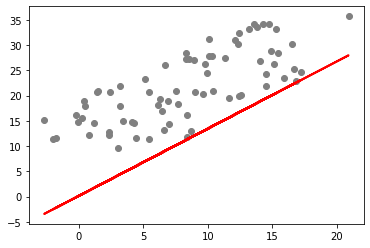

40


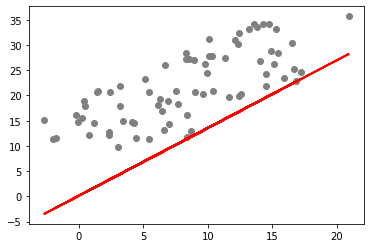

41


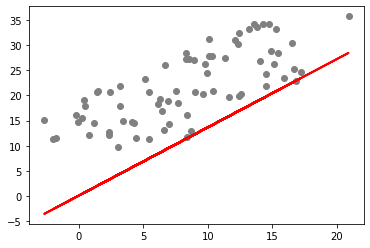

42


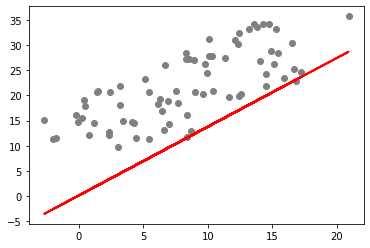

43


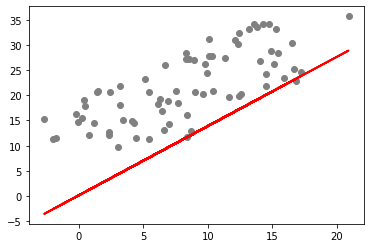

44


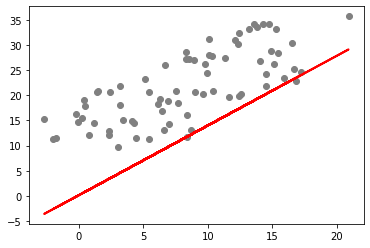

45


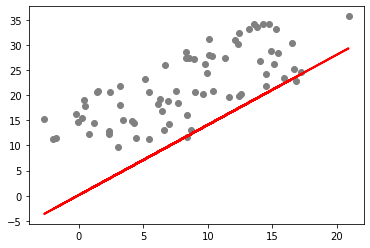

46


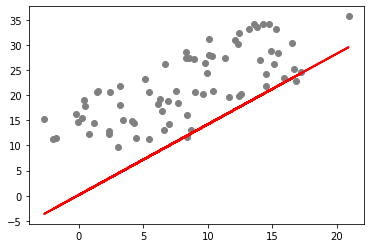

47


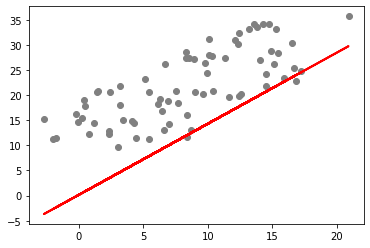

48


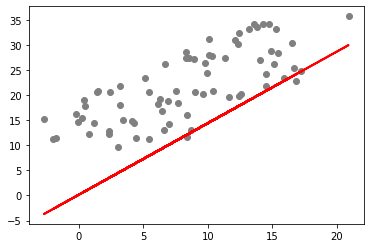

49


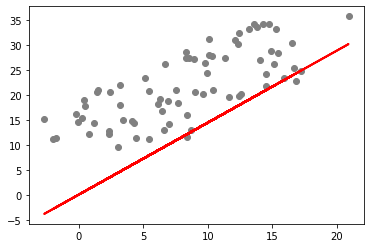

50


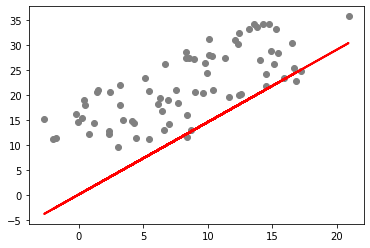

51


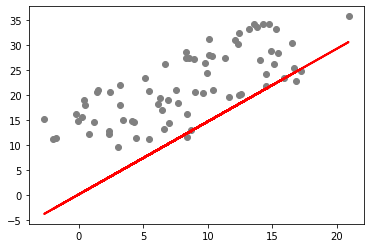

52


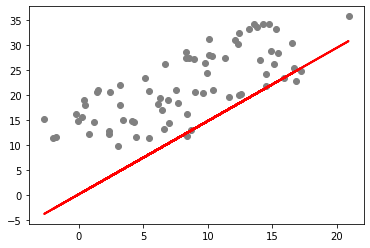

53


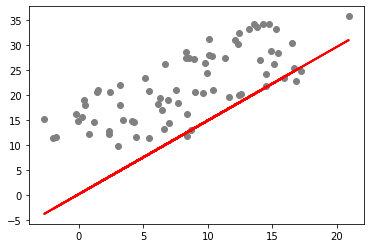

54


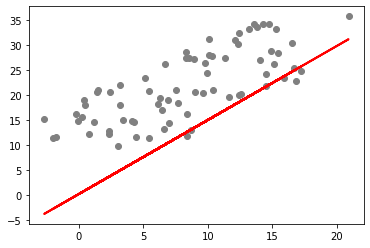

55


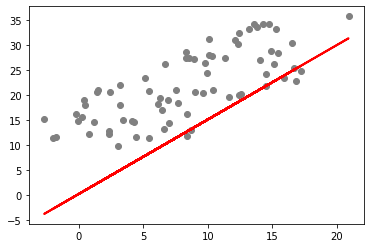

56


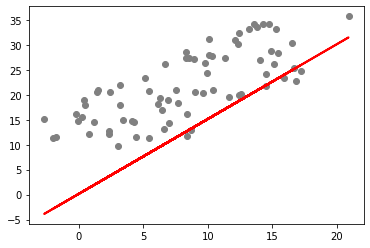

57


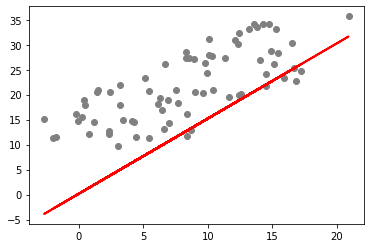

58


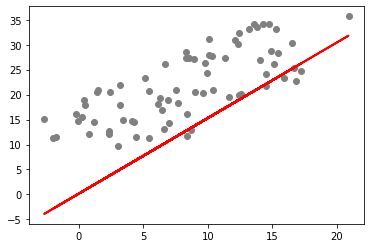

59


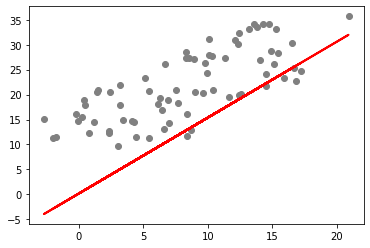

60


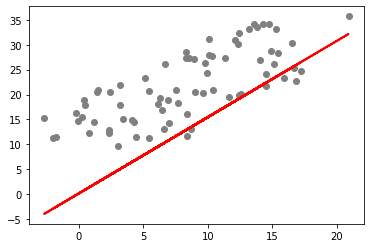

61


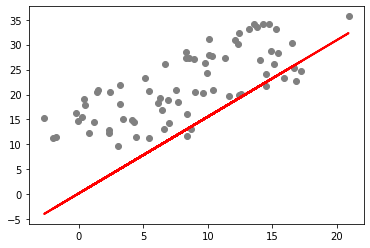

62


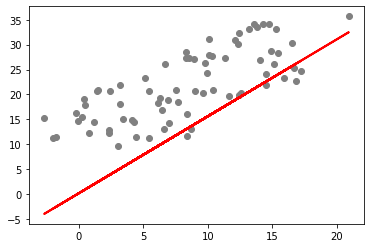

63


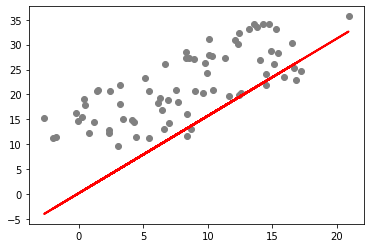

64


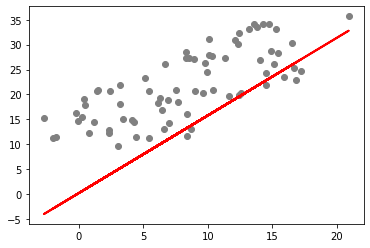

65


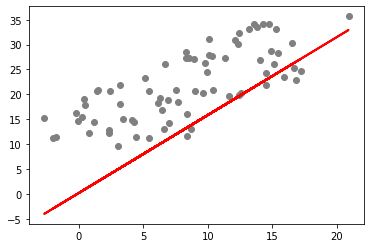

66


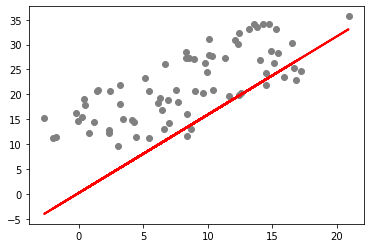

67


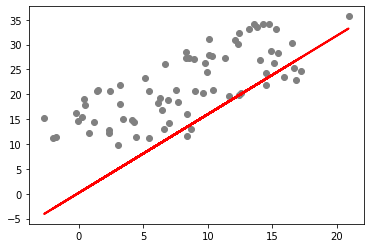

68


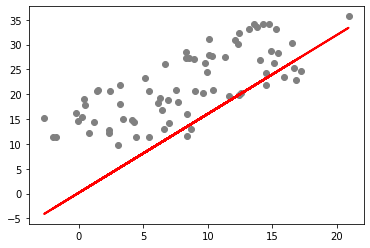

69


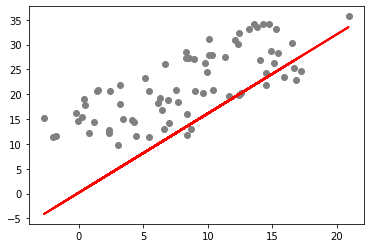

70


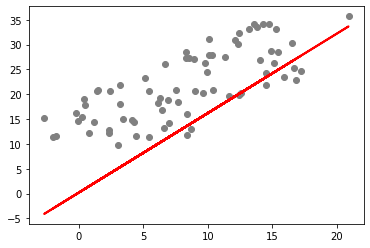

71


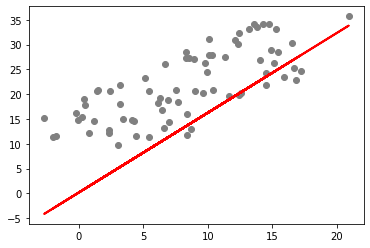

72


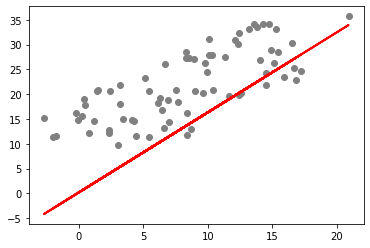

73


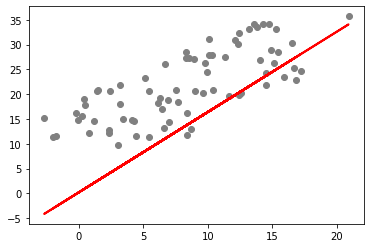

74


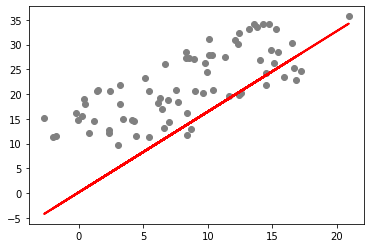

75


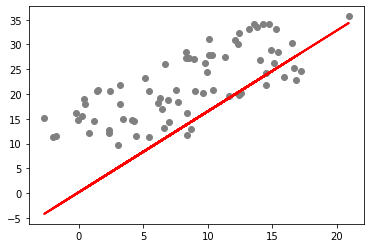

76


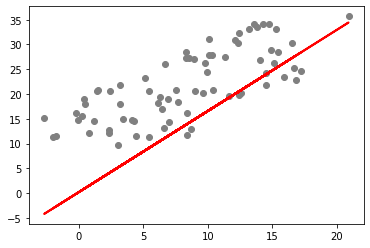

77


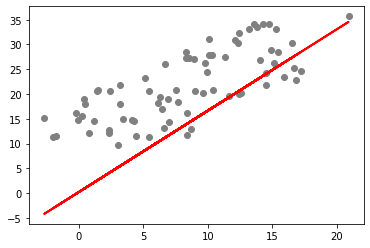

78


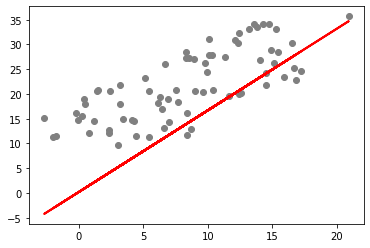

79


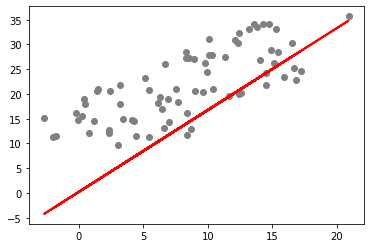

80


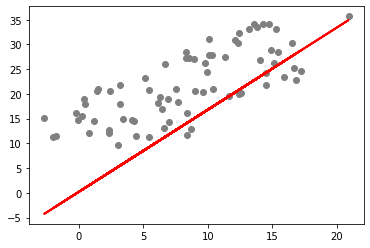

81


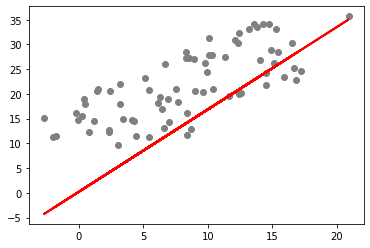

82


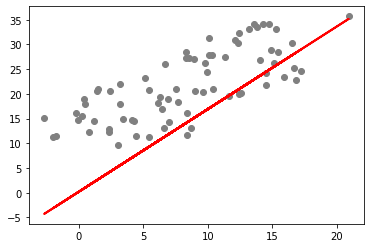

83


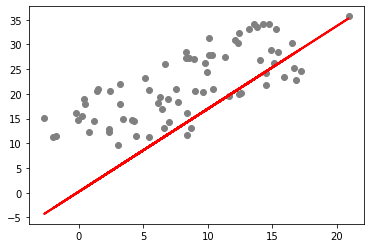

84


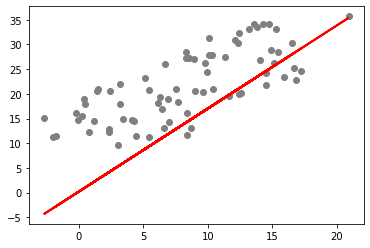

85


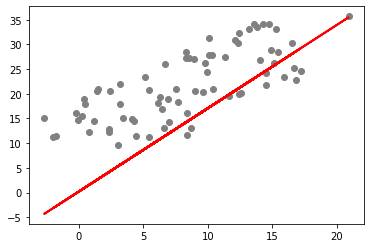

86


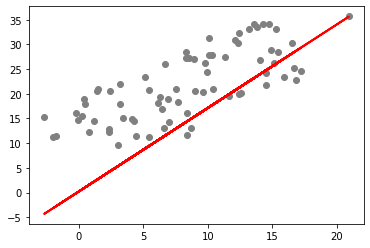

87


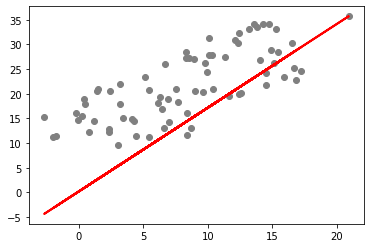

88


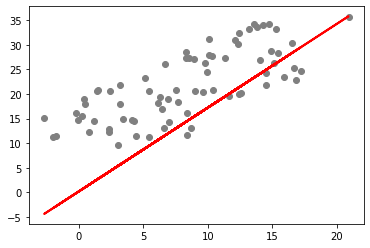

89


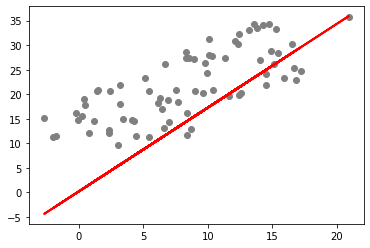

90


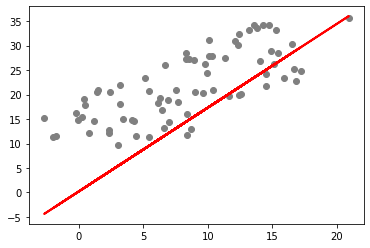

91


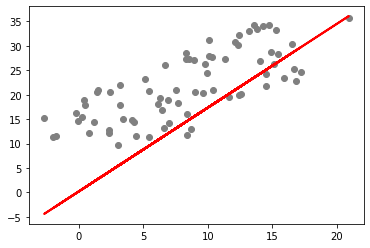

92


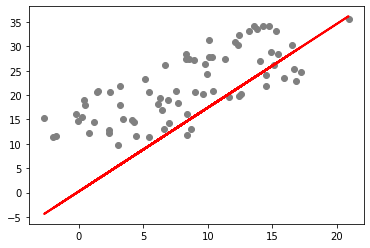

93


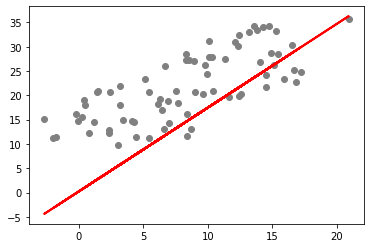

94


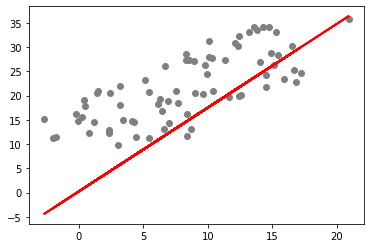

95


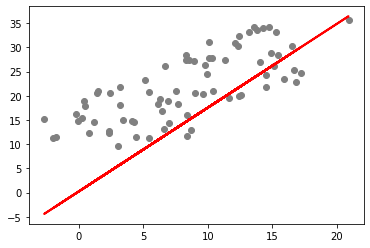

96


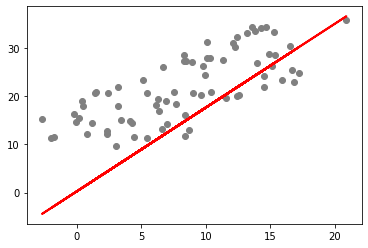

97


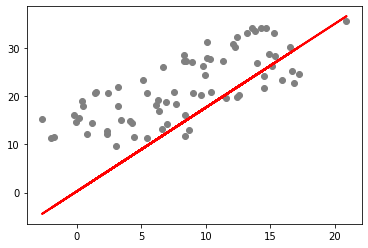

98


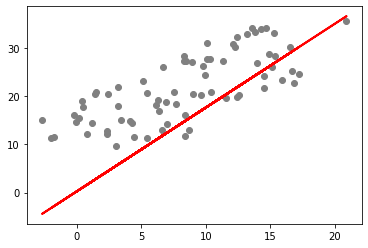

99


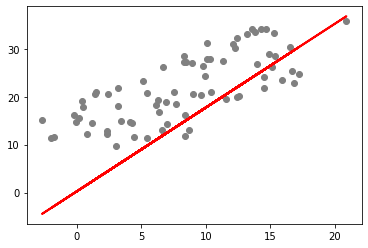

100


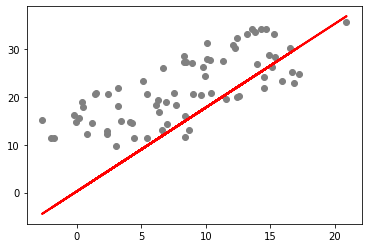

101


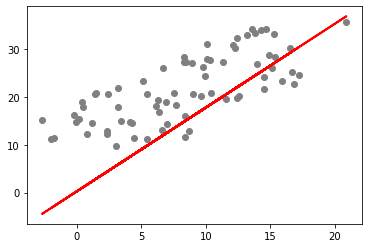

102


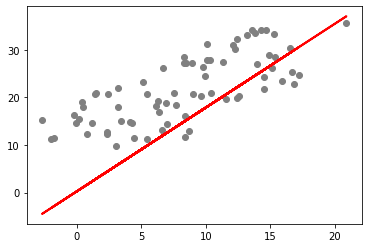

103


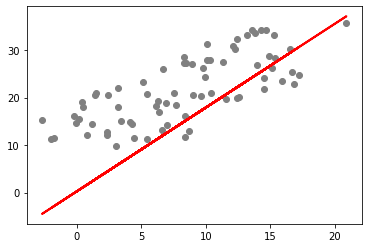

104


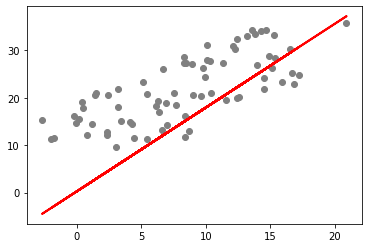

105


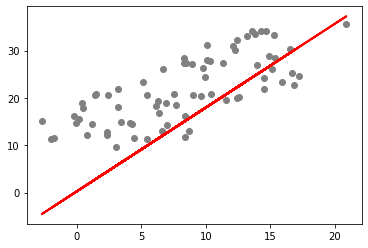

106


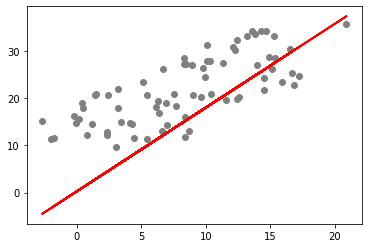

107


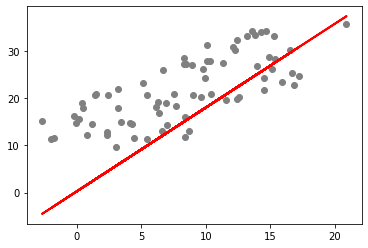

108


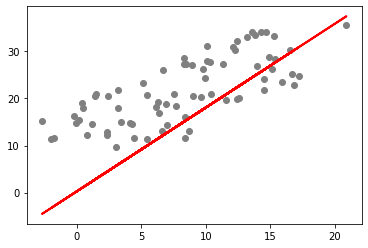

109


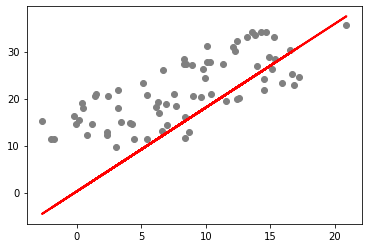

110


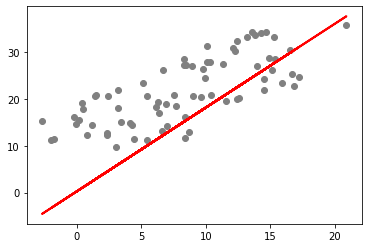

111


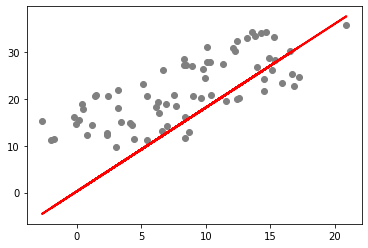

112


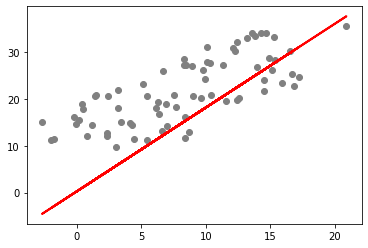

113


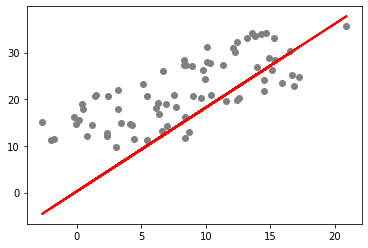

114


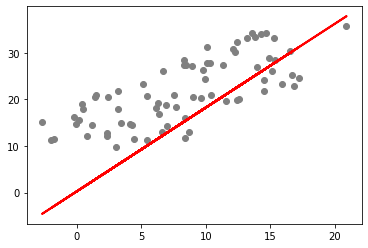

115


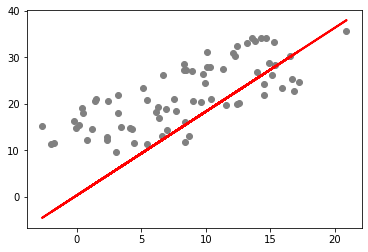

116


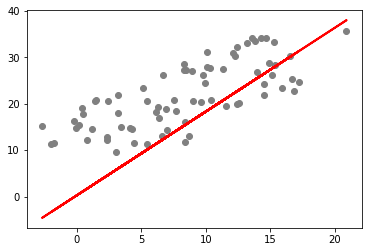

117


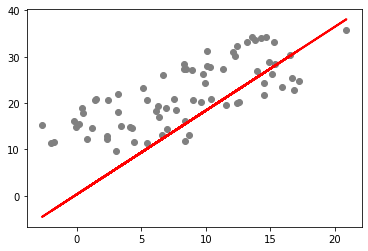

118


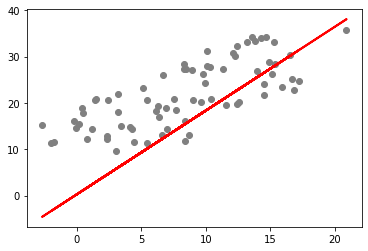

119


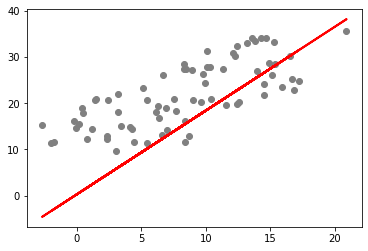

120


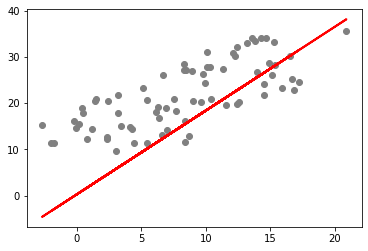

121


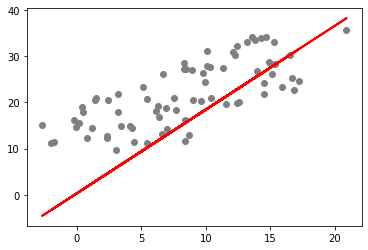

122


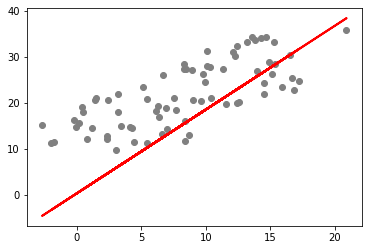

123


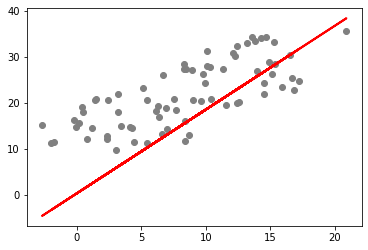

124


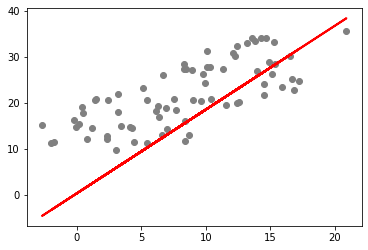

125


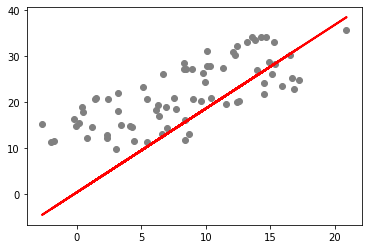

126


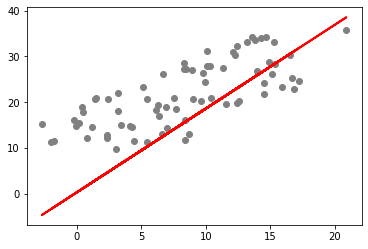

127


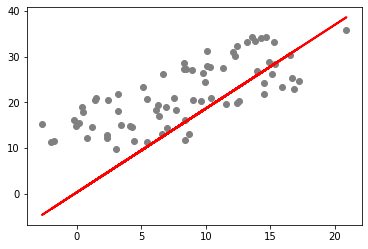

128


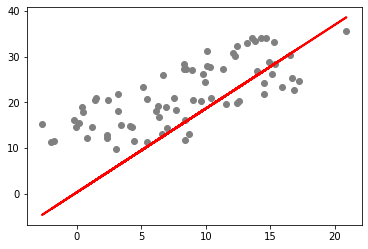

129


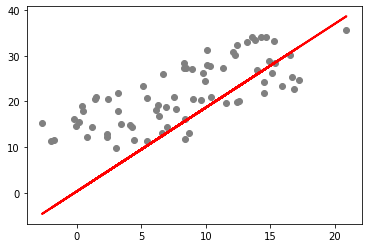

130


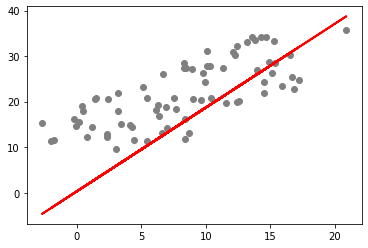

131


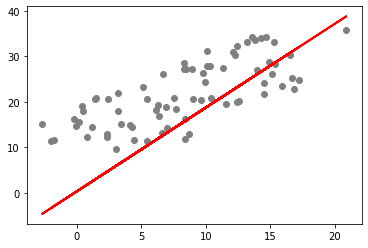

132


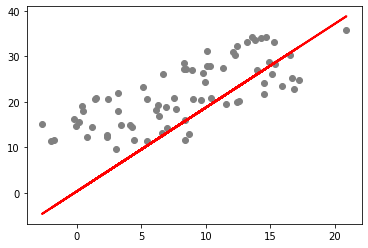

133


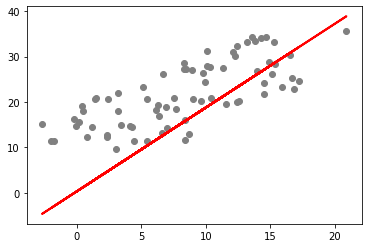

134


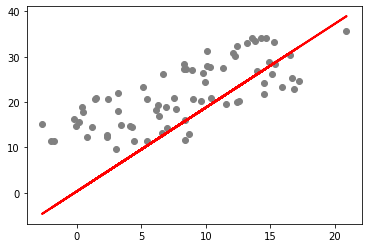

135


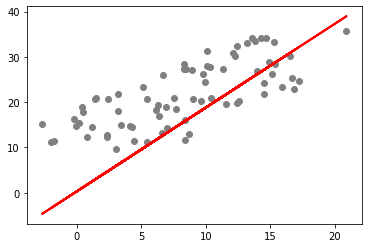

136


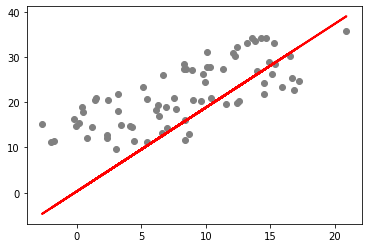

137


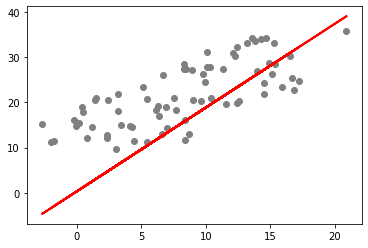

138


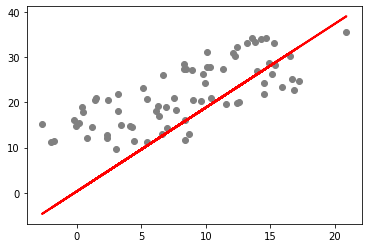

139


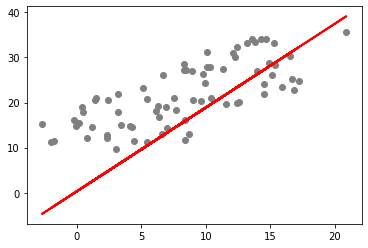

140


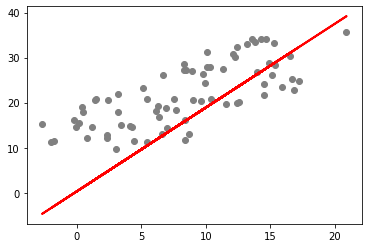

141


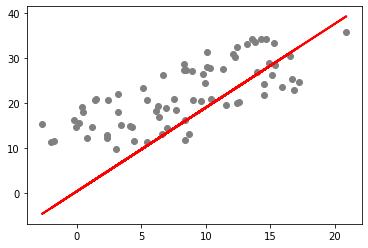

142


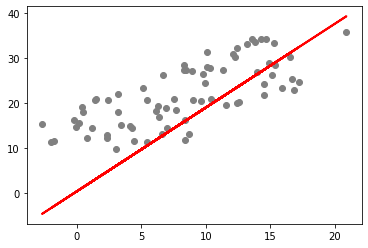

143


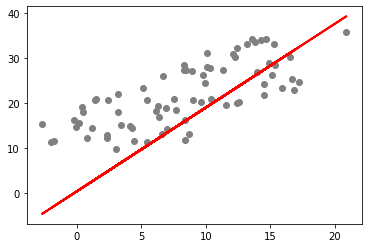

144


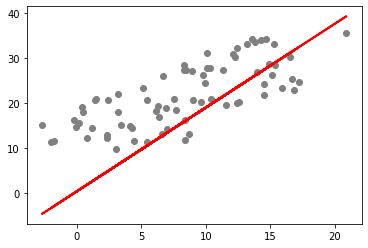

145


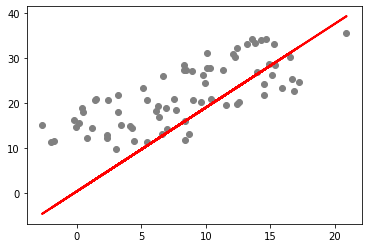

146


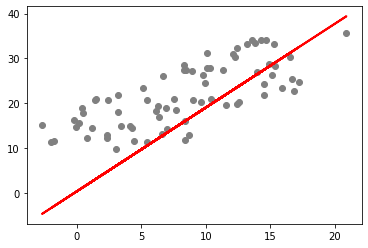

147


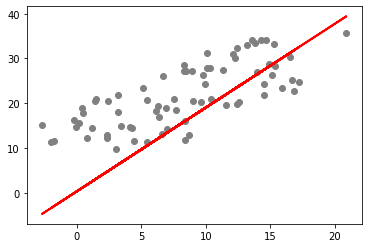

148


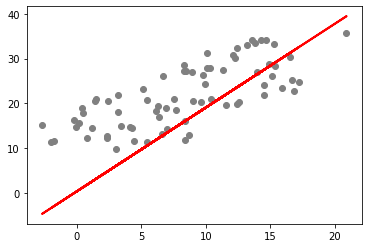

149


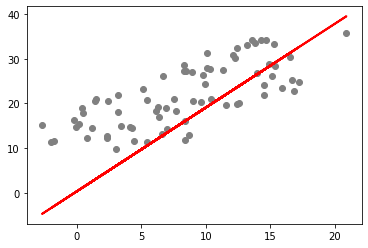

150


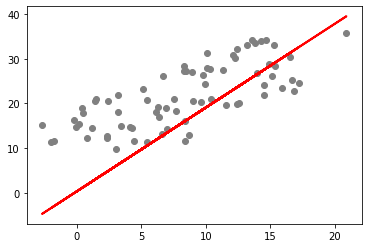

151


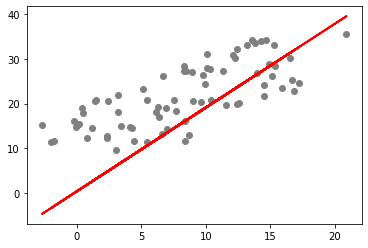

152


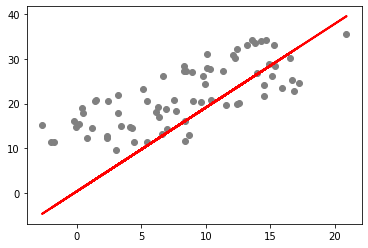

153


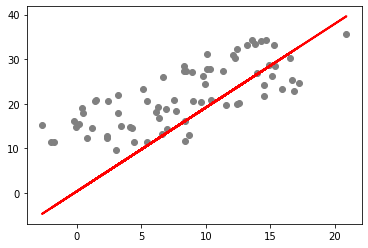

154


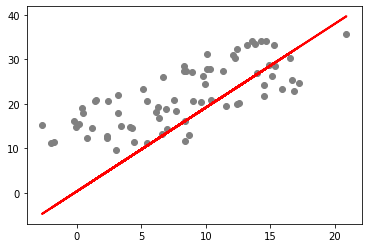

155


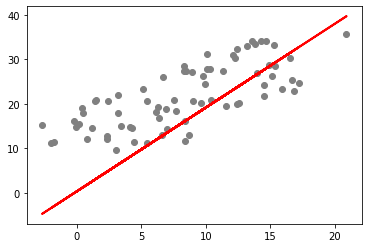

156


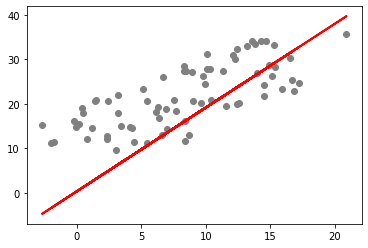

157


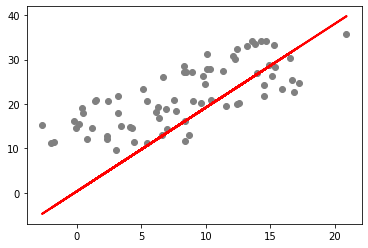

158


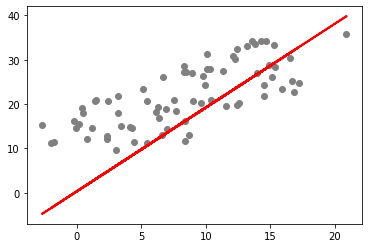

159


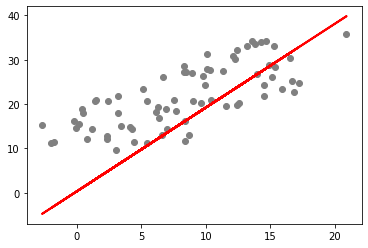

160


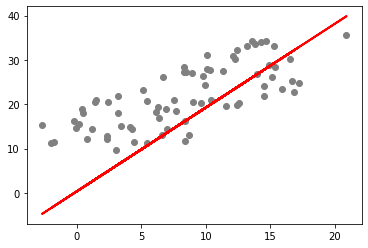

161


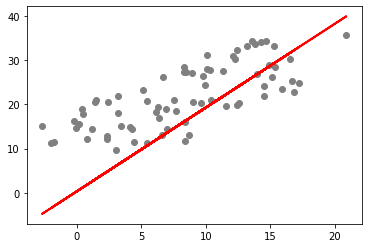

162


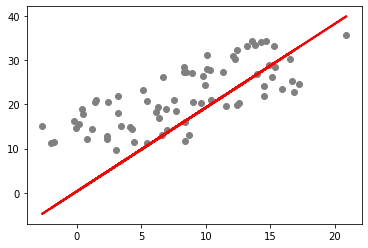

163


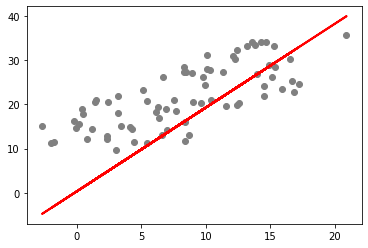

164


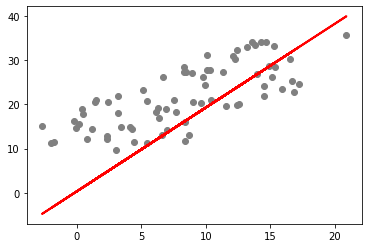

165


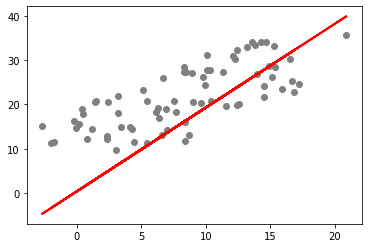

166


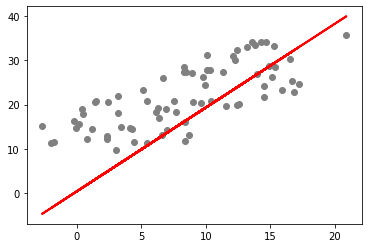

167


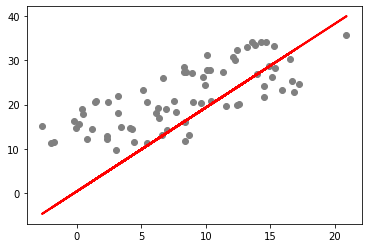

168


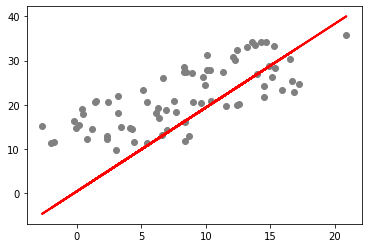

169


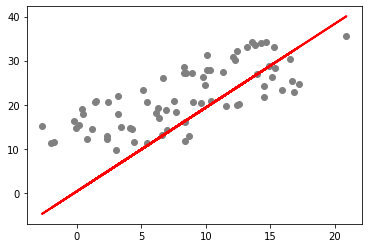

170


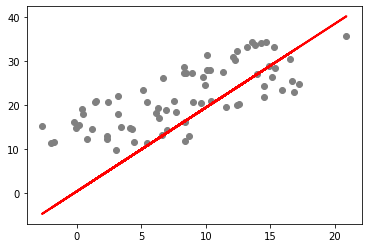

171


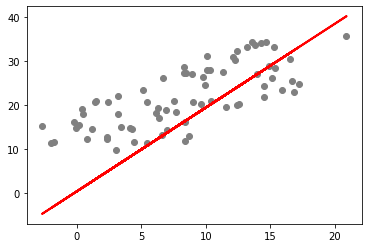

172


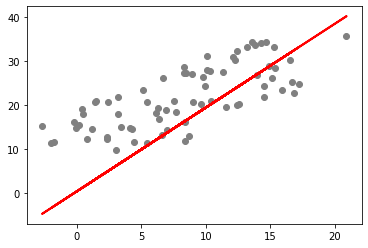

173


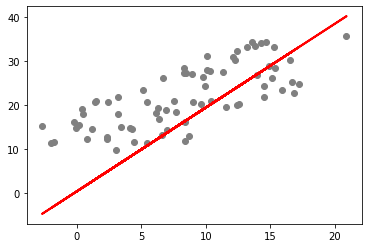

174


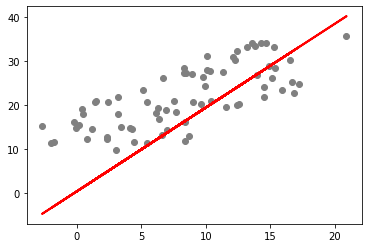

175


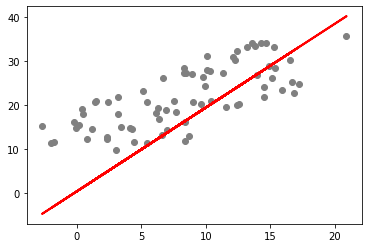

176


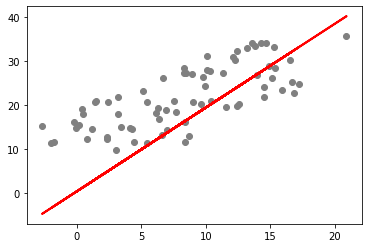

177


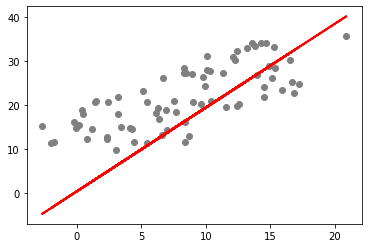

178


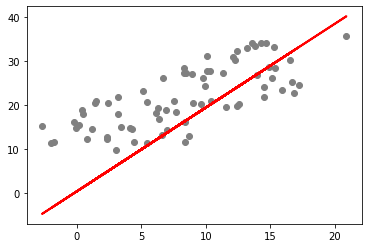

179


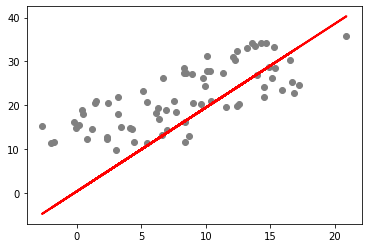

180


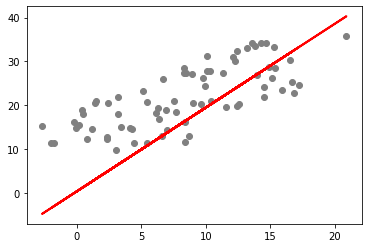

181


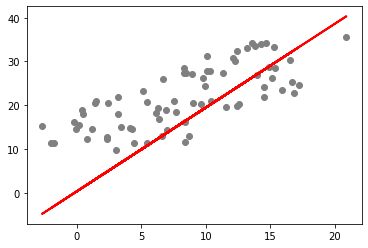

182


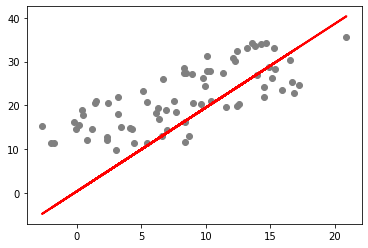

183


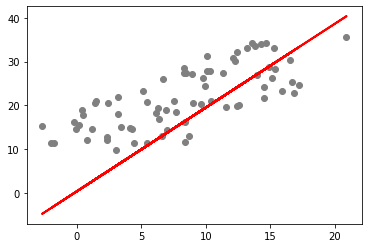

184


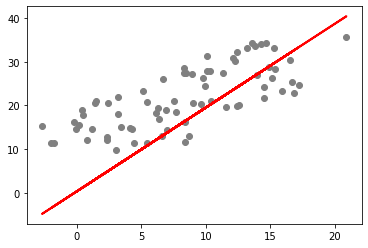

185


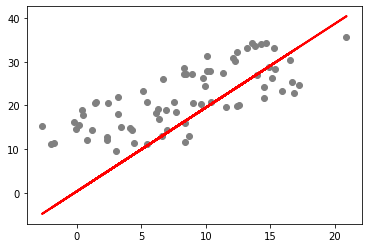

186


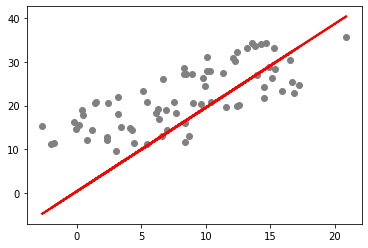

187


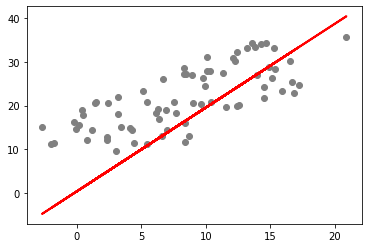

188


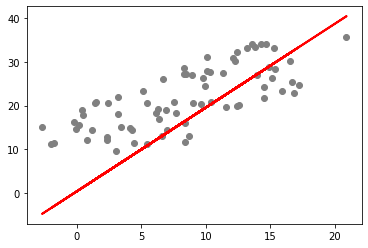

189


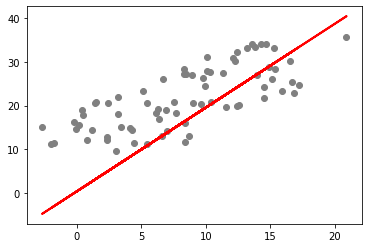

190


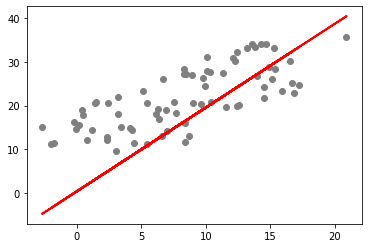

191


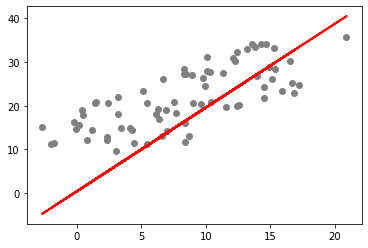

192


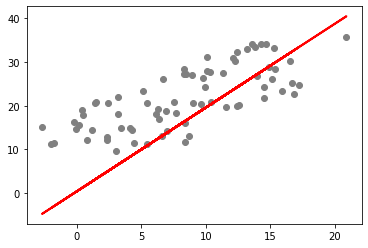

193


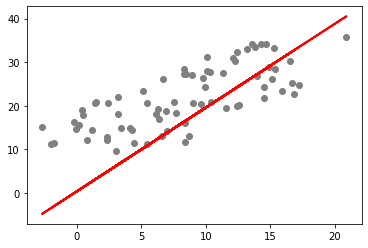

194


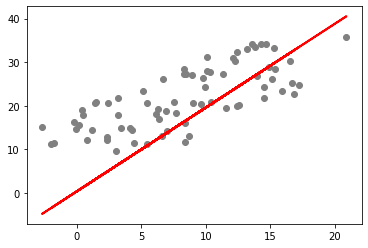

195


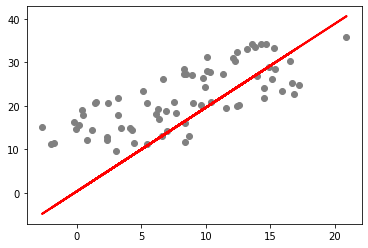

196


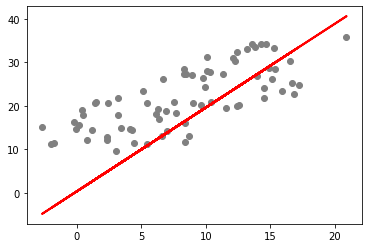

197


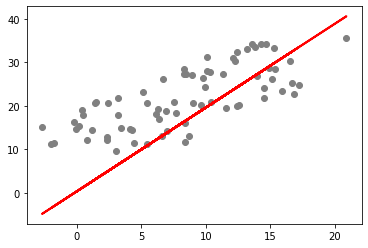

198


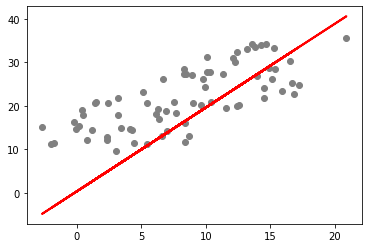

199


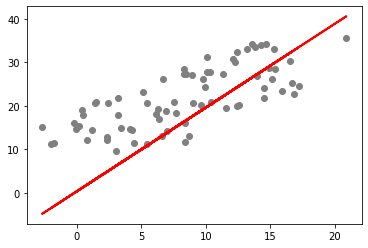

200


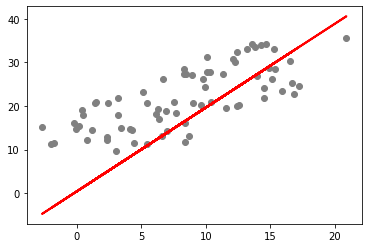

201


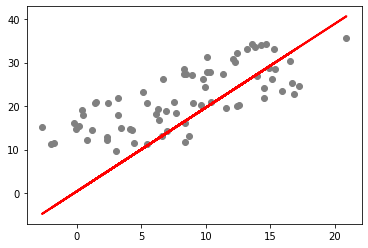

202


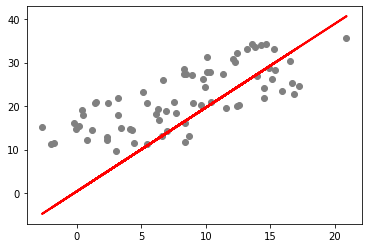

203


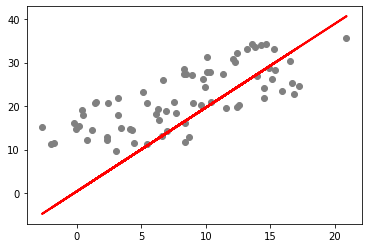

204


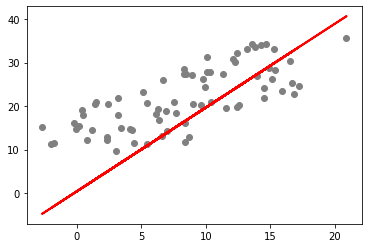

205


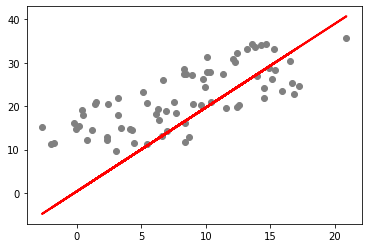

206


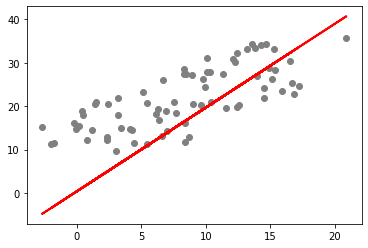

207


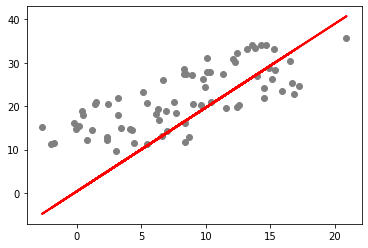

208


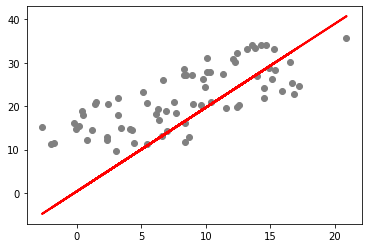

209


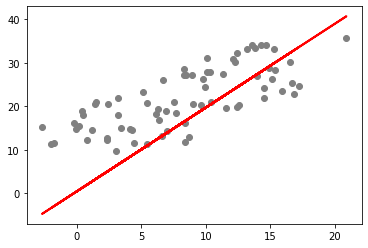

210


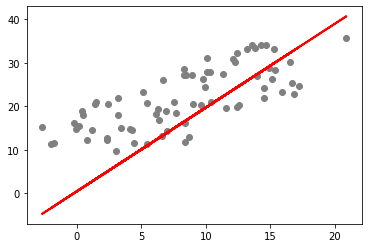

211


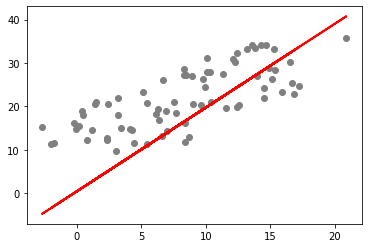

212


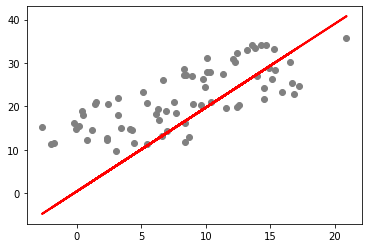

213


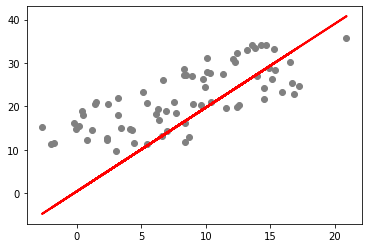

214


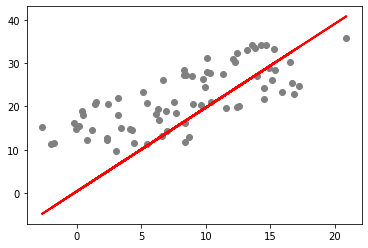

215


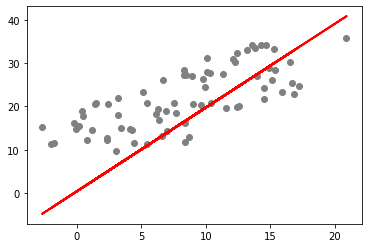

216


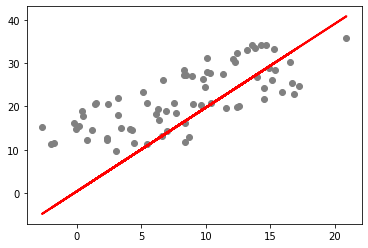

217


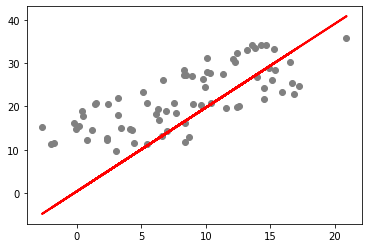

218


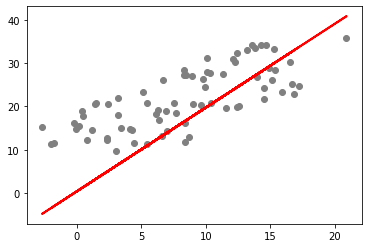

219


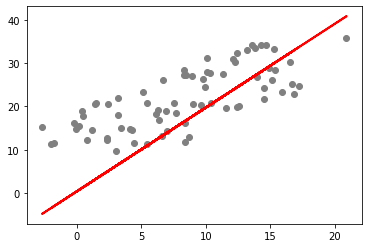

220


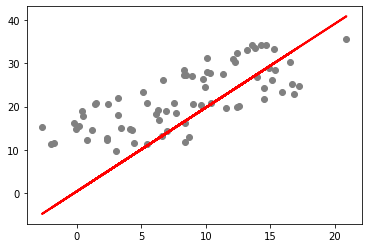

221


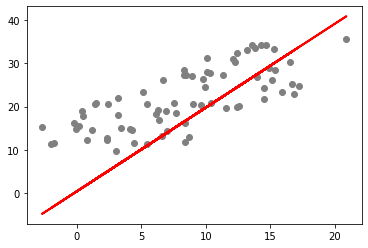

222


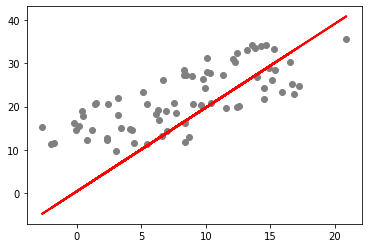

223


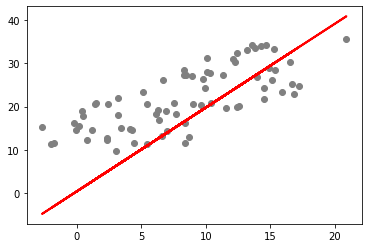

224


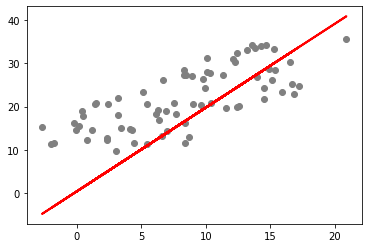

225


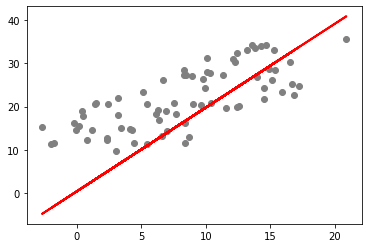

226


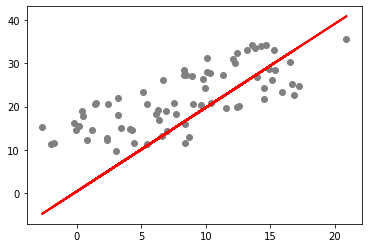

227


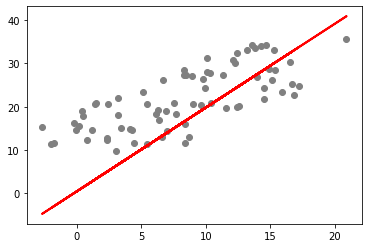

228


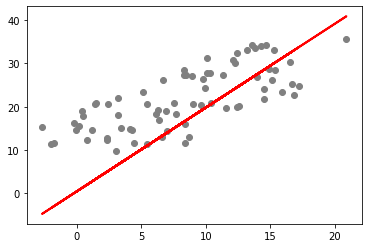

229


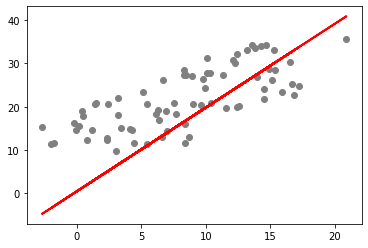

230


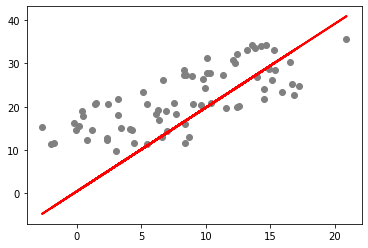

231


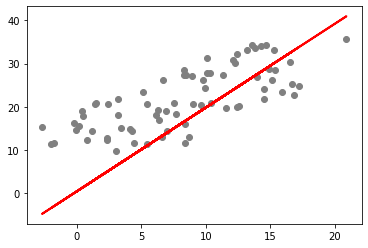

232


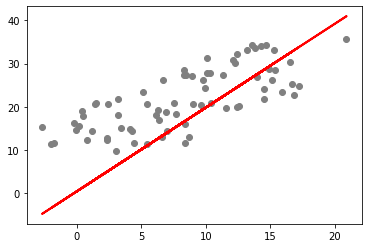

233


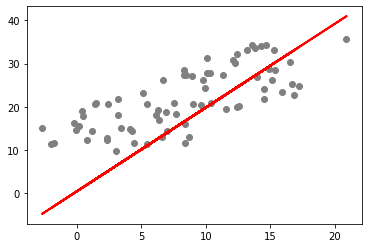

234


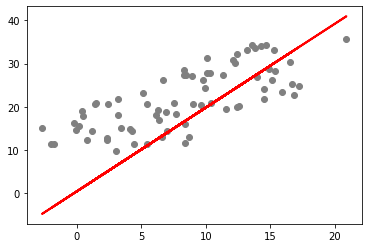

235


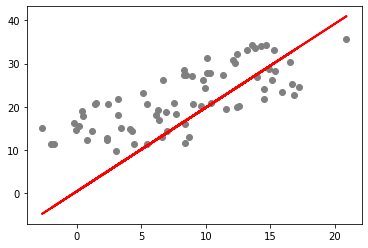

236


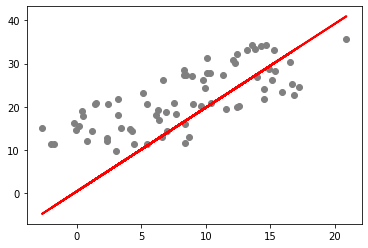

237


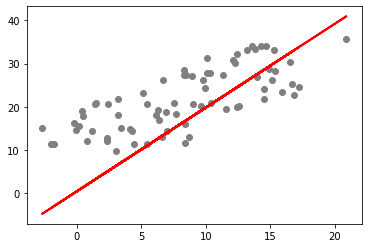

238


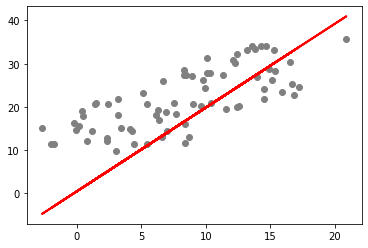

239


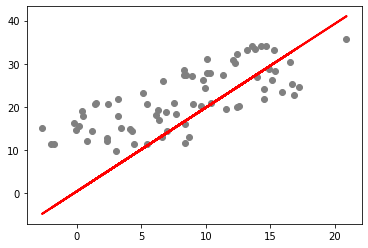

240


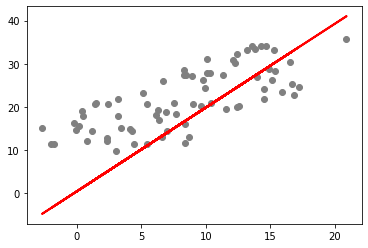

241


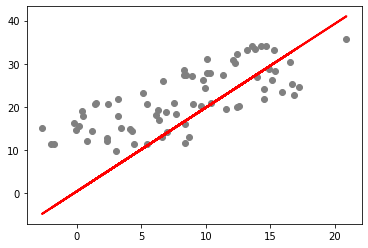

242


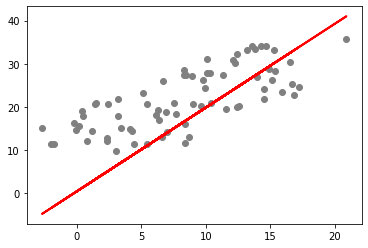

243


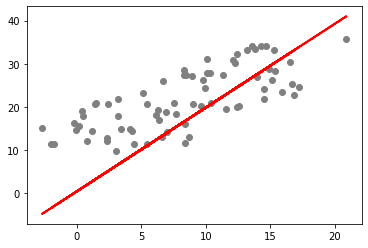

244


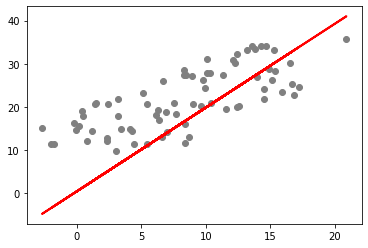

245


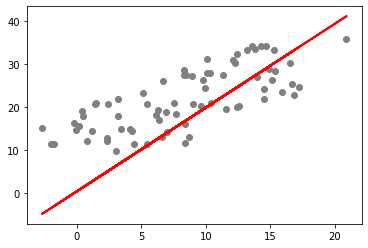

246


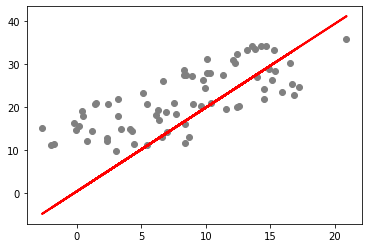

247


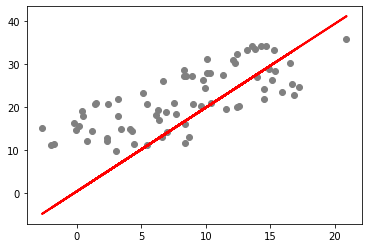

248


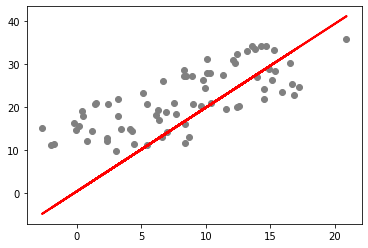

249


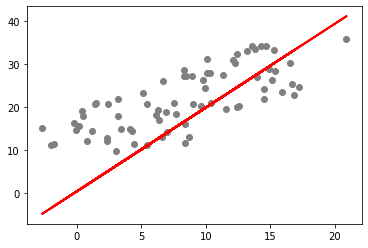

250


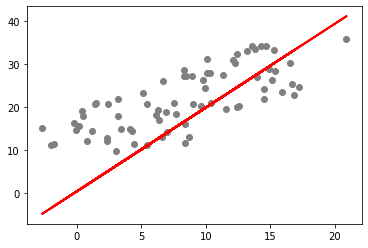

251


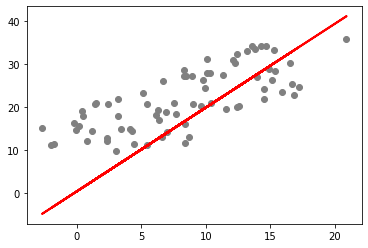

252


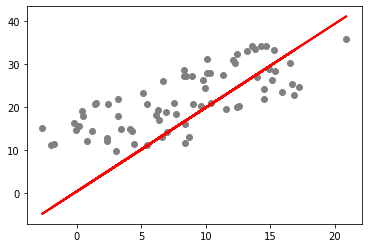

253


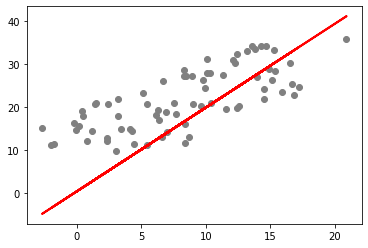

254


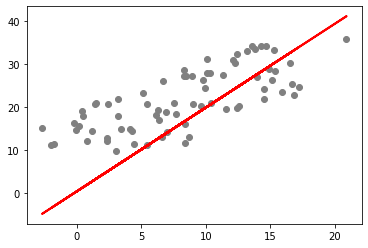

255


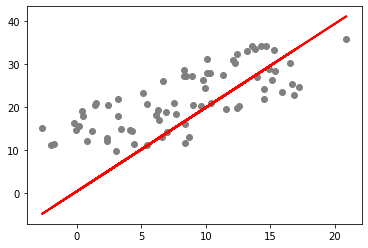

256


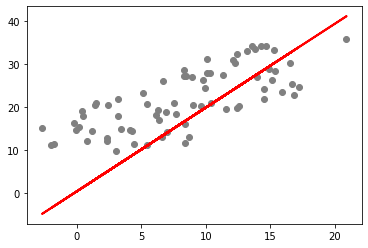

257


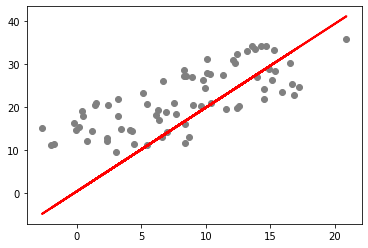

258


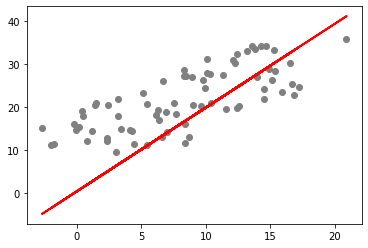

259


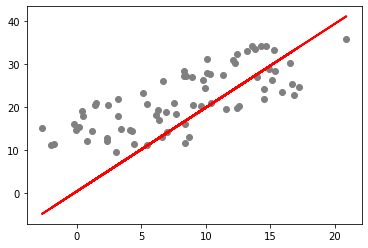

260


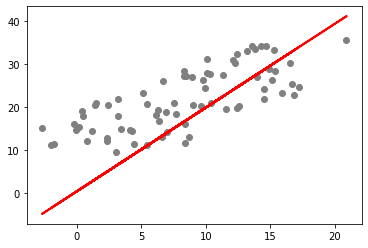

261


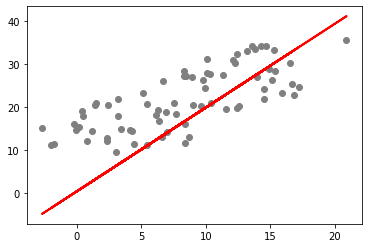

262


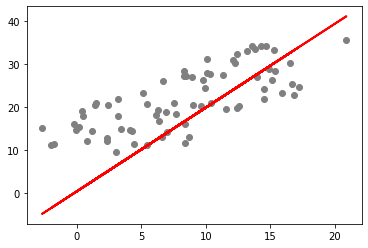

263


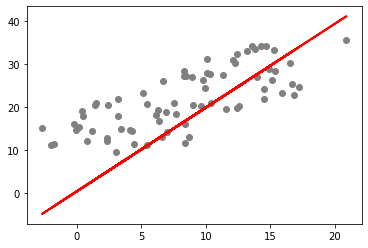

264


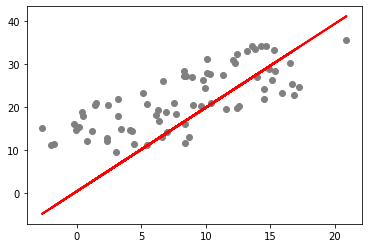

265


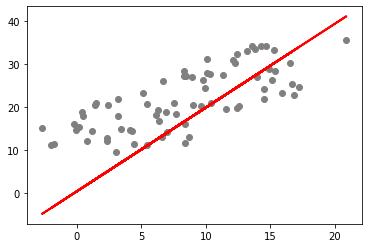

266


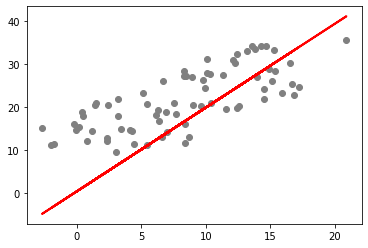

267


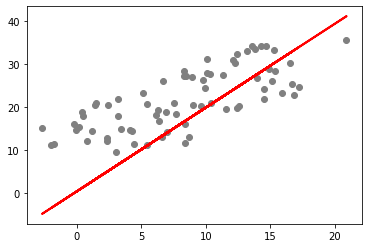

268


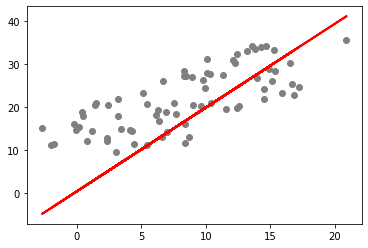

269


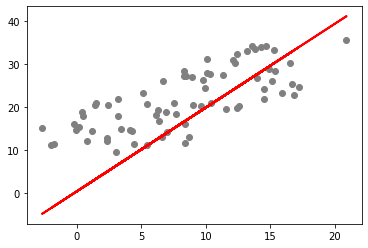

270


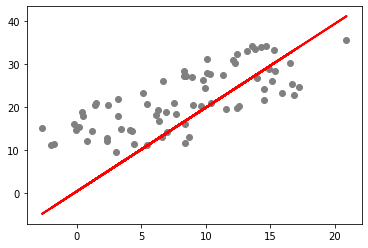

271


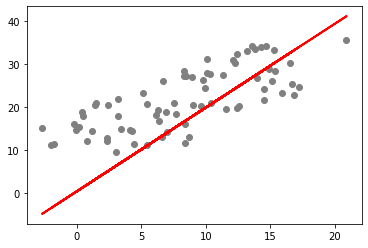

272


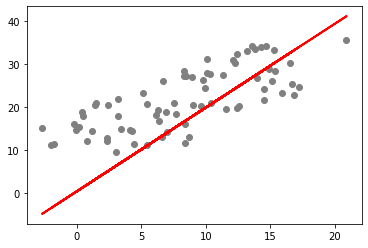

273


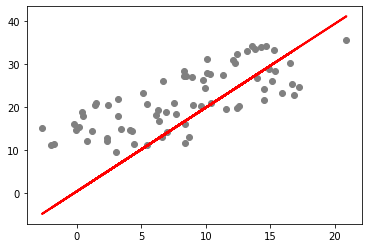

274


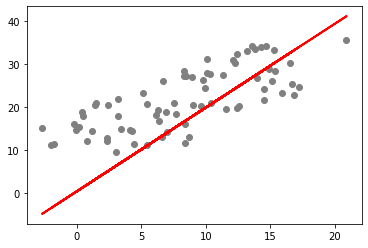

275


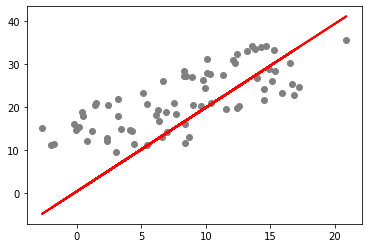

276


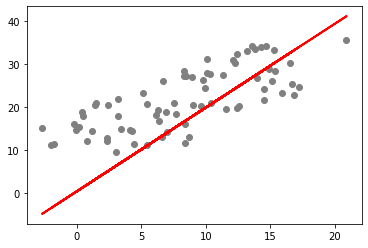

277


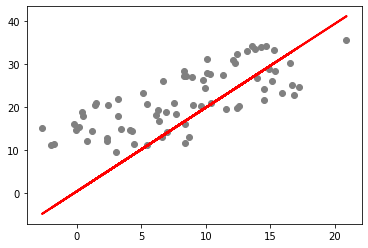

278


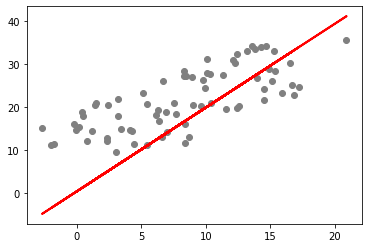

279


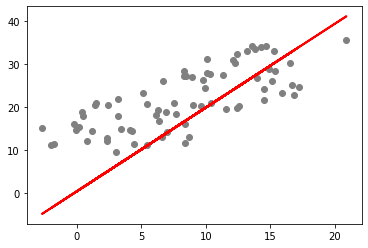

280


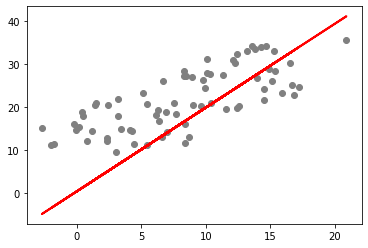

281


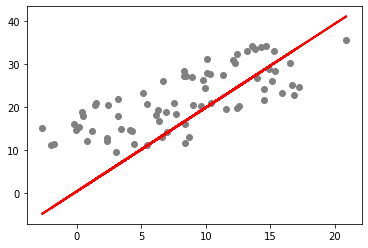

282


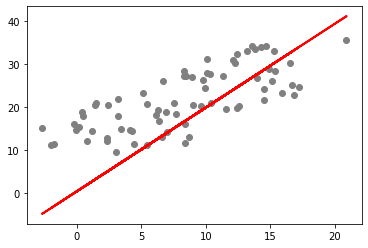

283


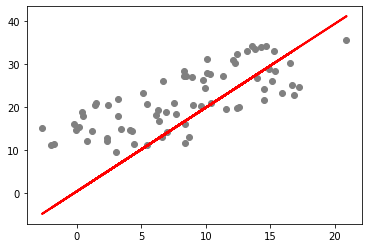

284


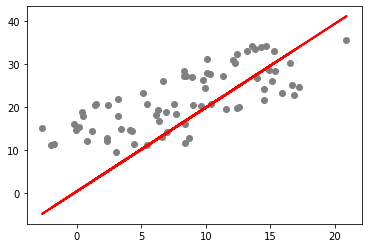

285


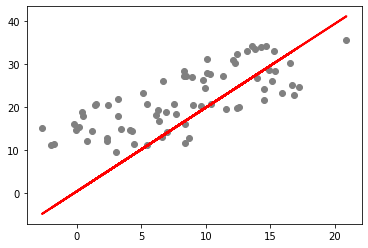

286


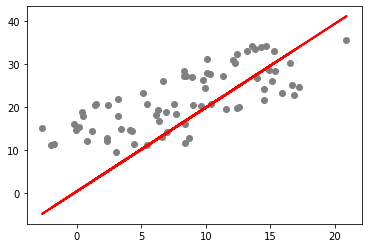

287


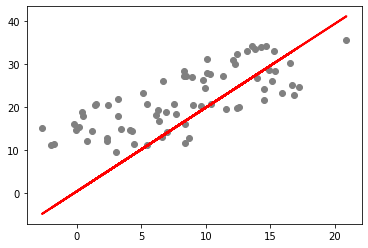

288


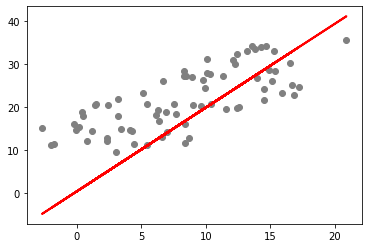

289


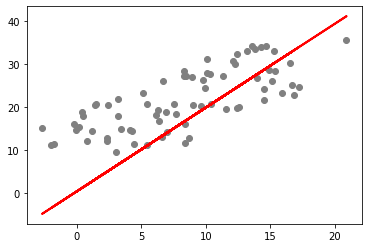

290


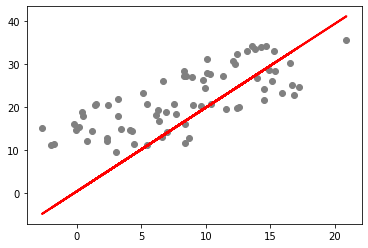

291


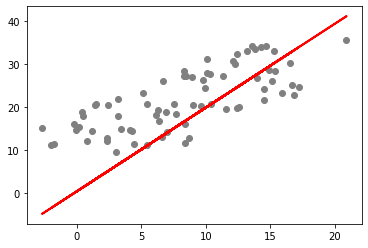

292


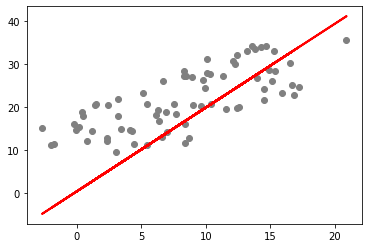

293


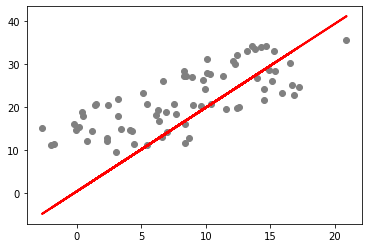

294


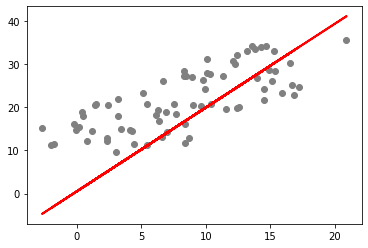

295


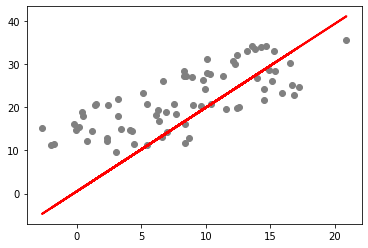

296


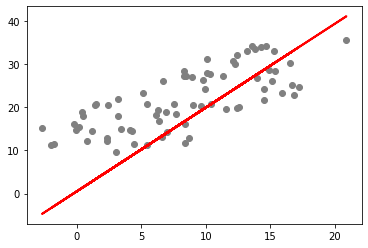

297


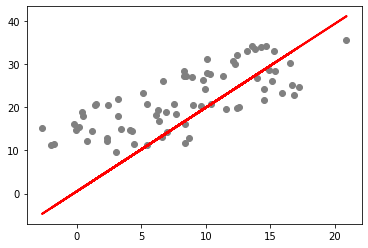

298


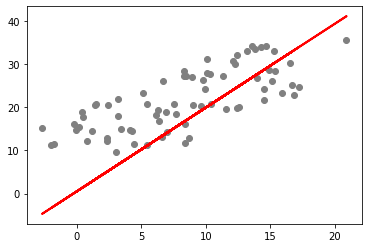

299


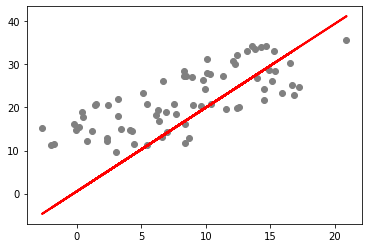

300


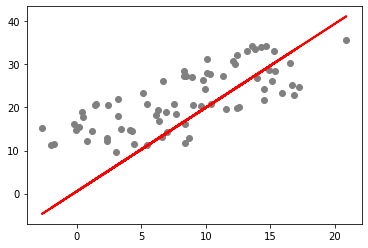

301


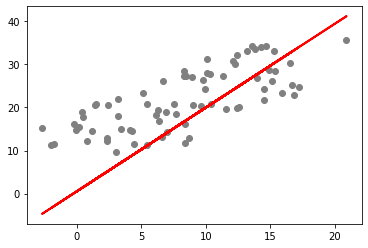

302


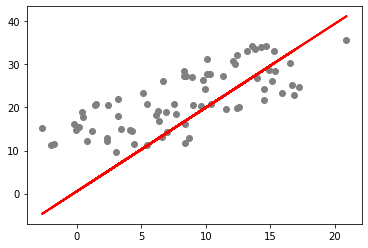

303


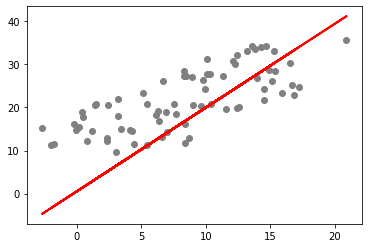

304


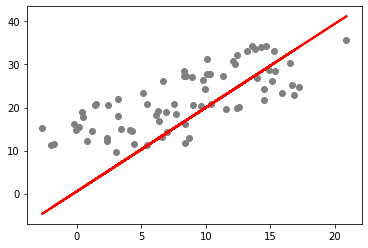

305


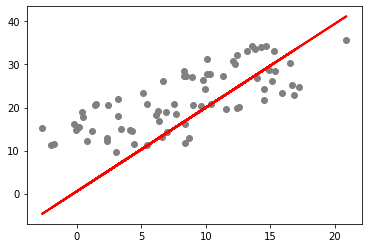

306


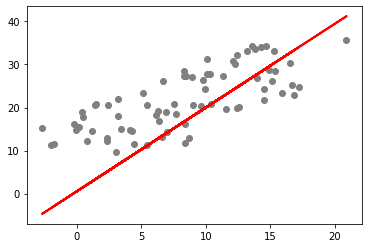

307


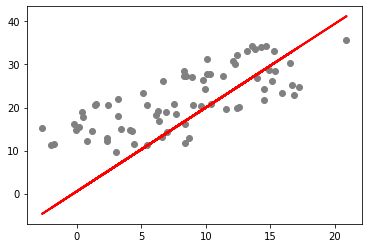

308


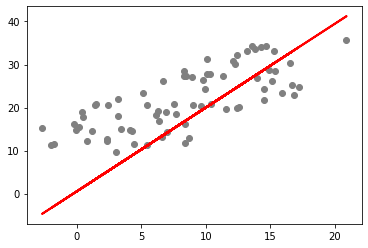

309


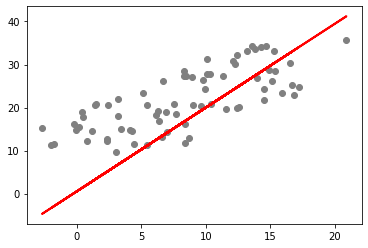

310


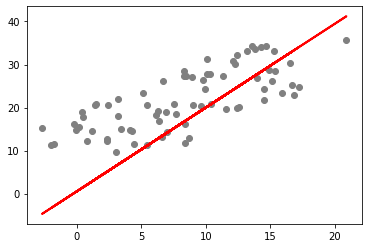

311


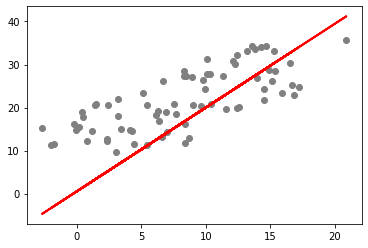

312


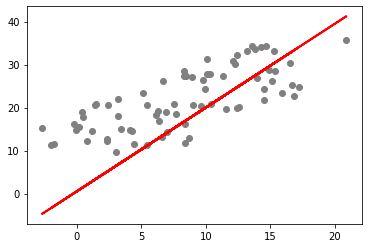

313


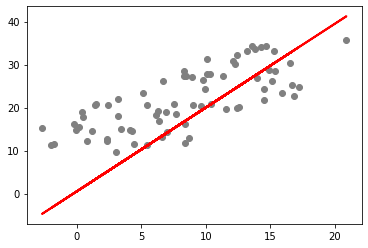

314


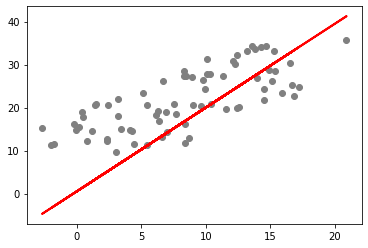

315


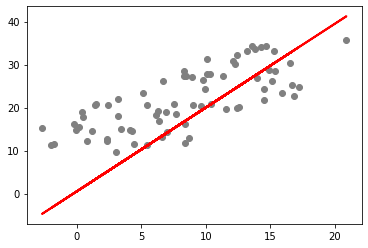

316


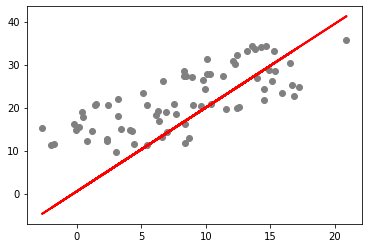

317


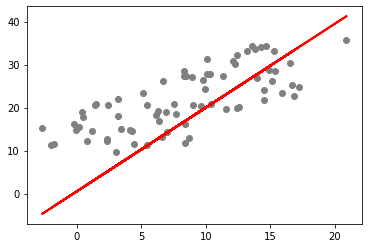

318


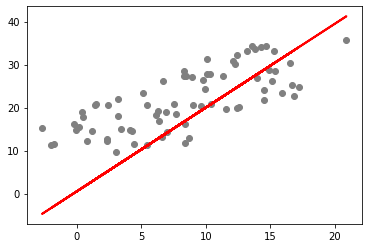

319


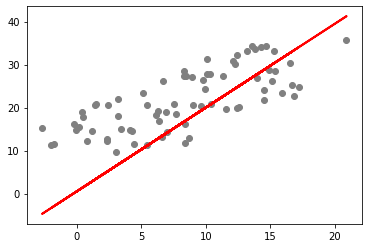

320


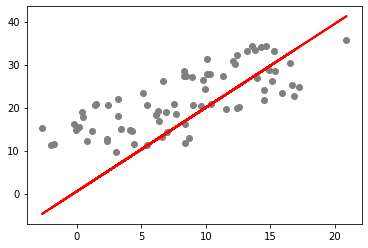

321


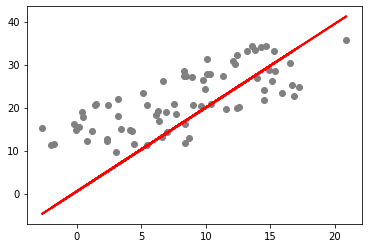

322


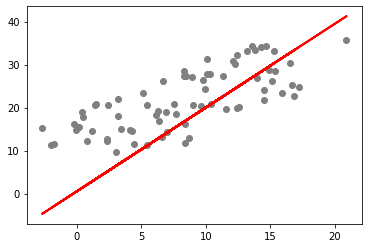

323


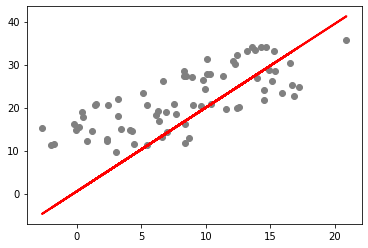

324


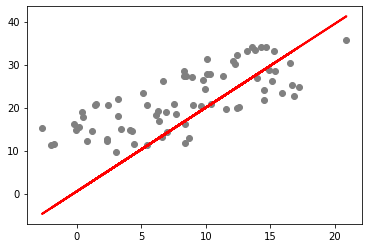

325


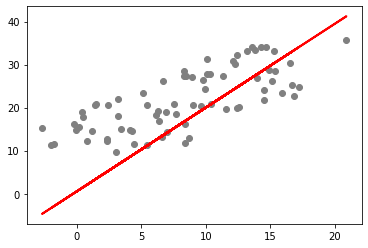

326


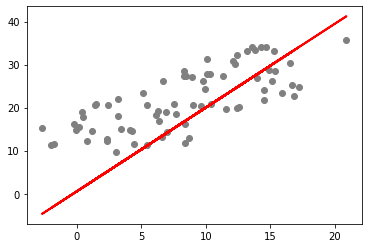

327


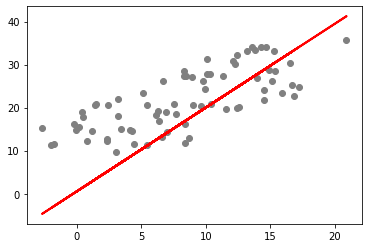

328


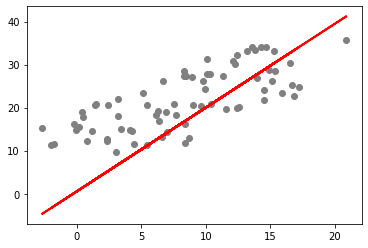

329


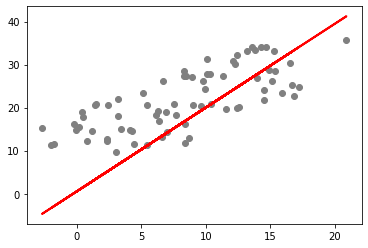

330


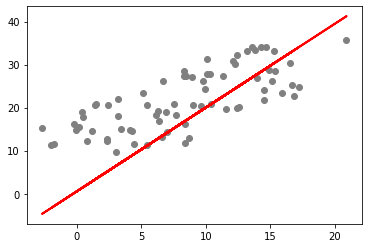

331


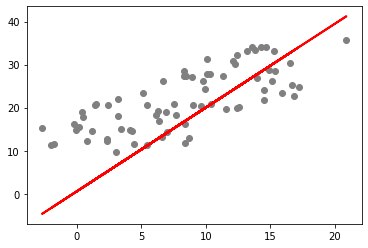

332


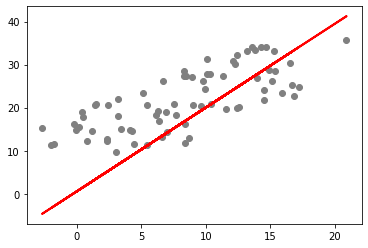

333


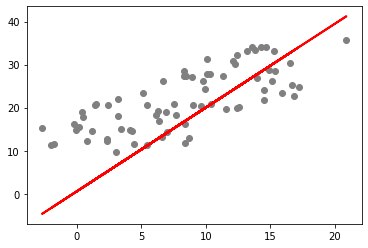

334


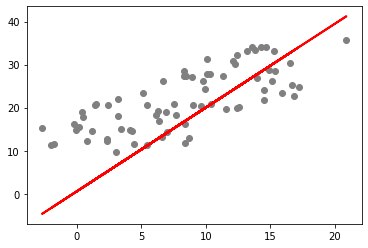

335


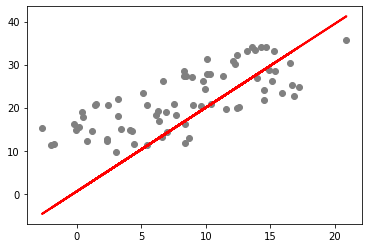

336


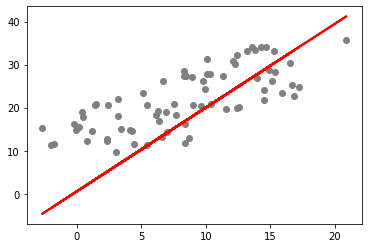

337


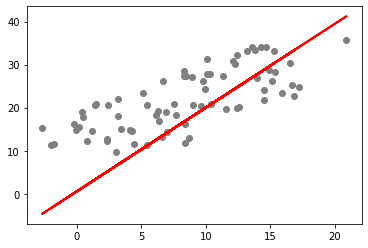

338


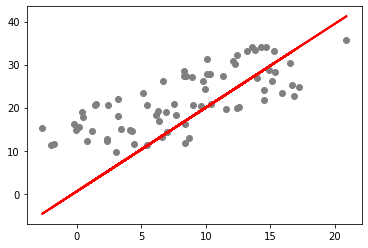

339


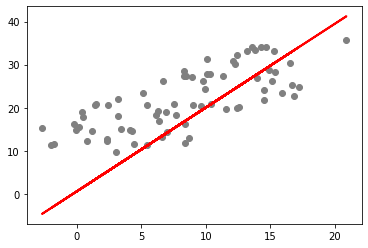

340


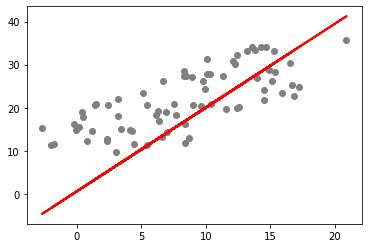

341


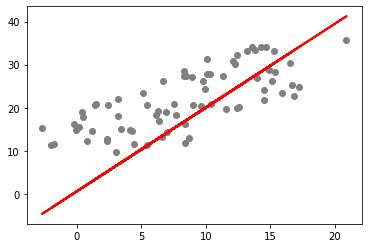

342


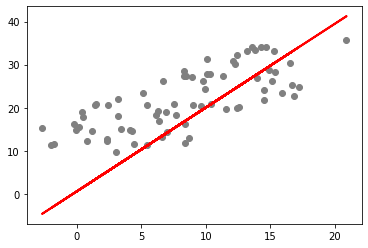

343


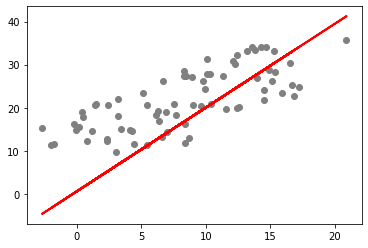

344


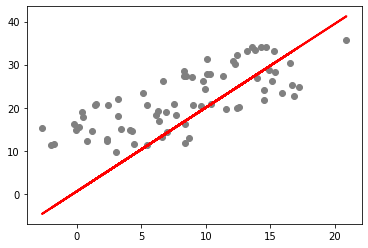

345


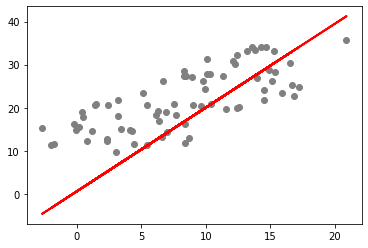

346


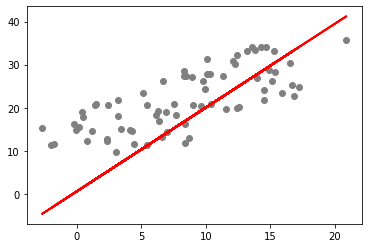

347


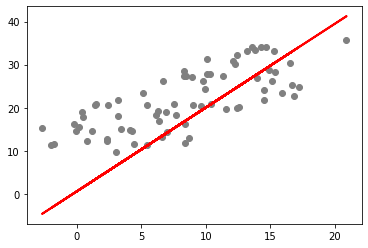

348


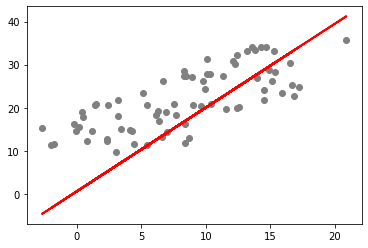

349


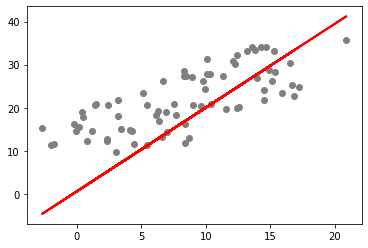

350


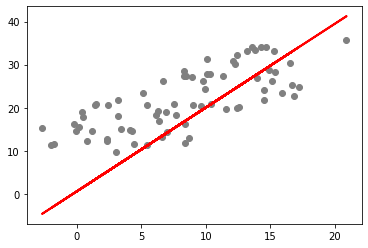

351


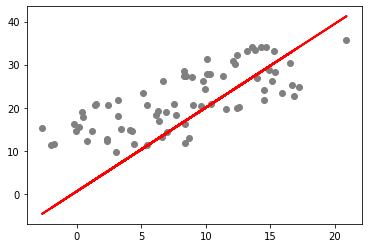

352


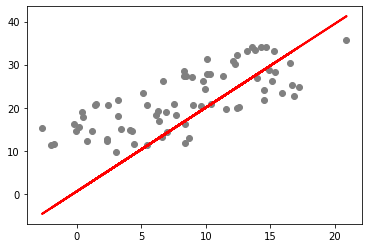

353


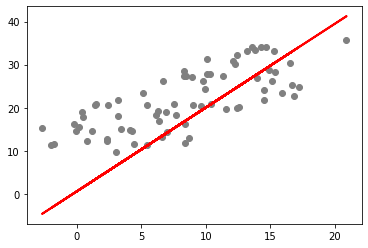

354


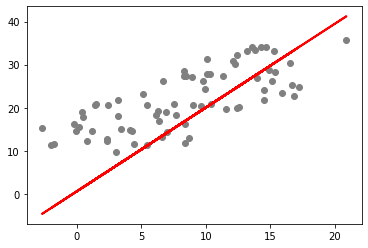

355


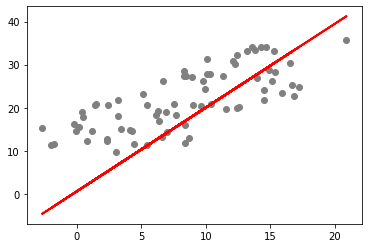

356


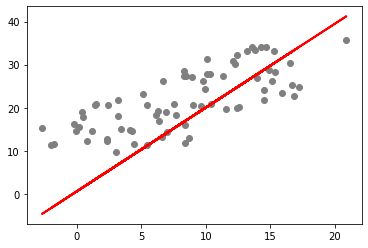

357


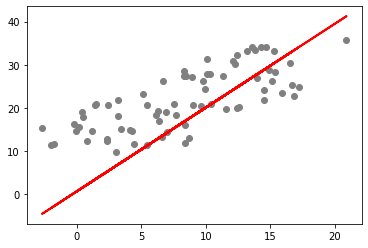

358


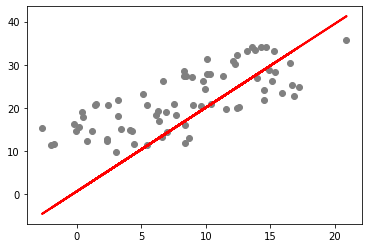

359


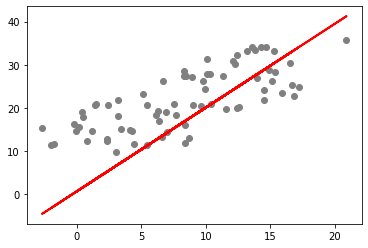

360


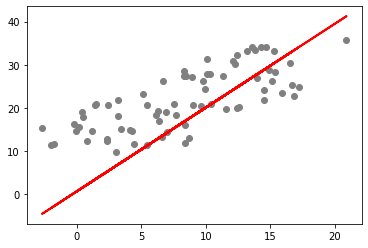

361


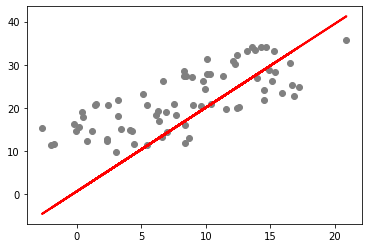

362


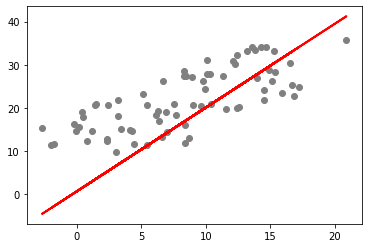

363


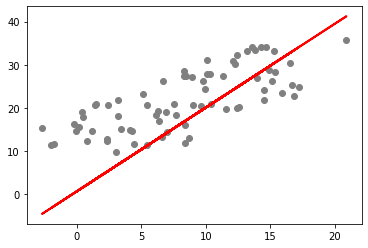

364


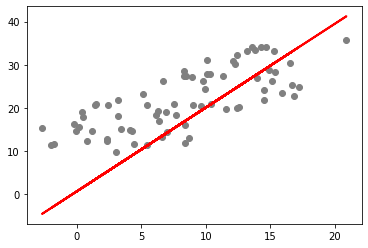

365


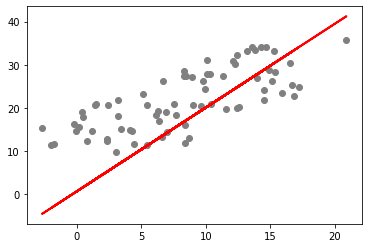

366


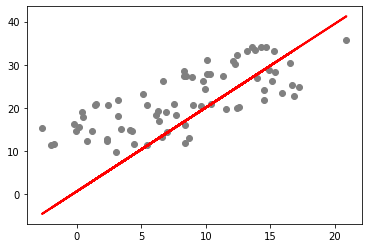

367


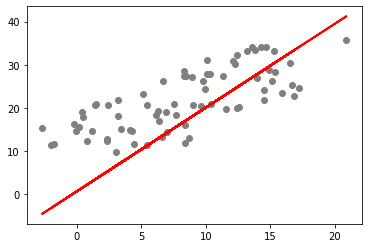

368


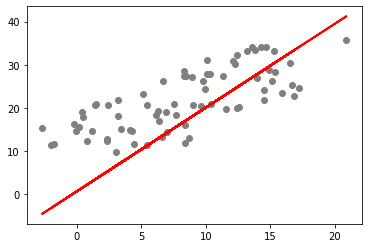

369


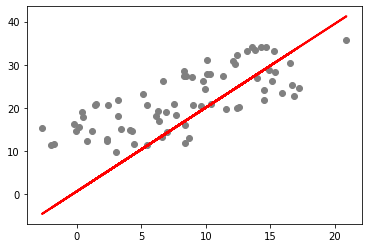

370


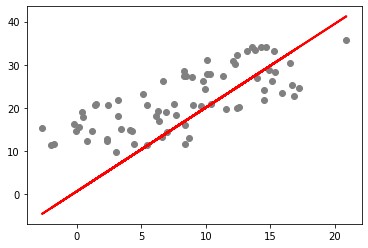

371


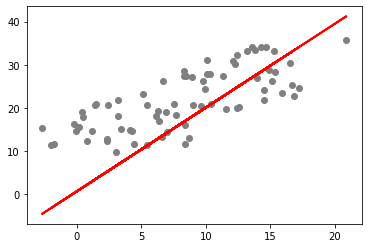

372


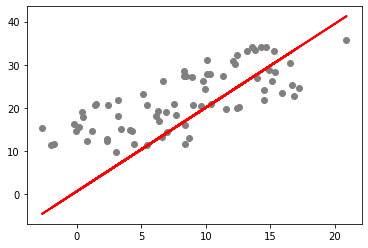

373


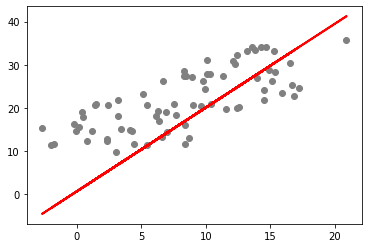

374


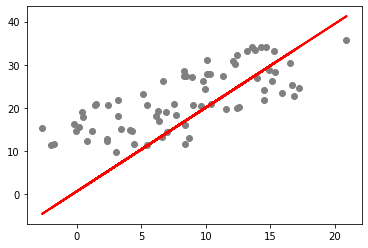

375


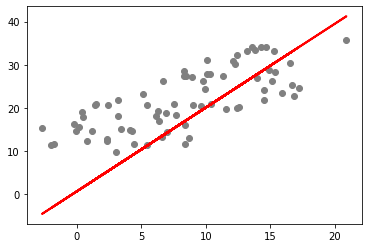

376


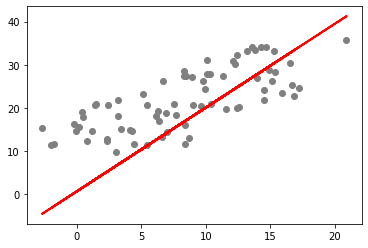

377


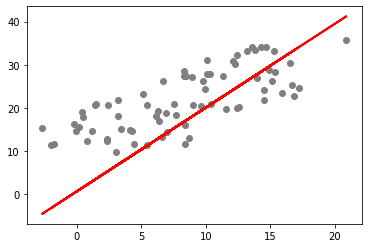

378


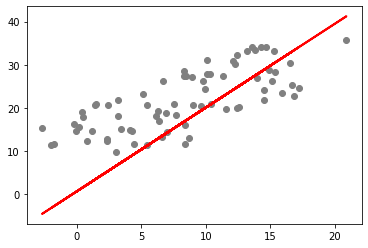

379


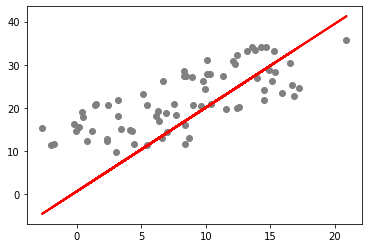

380


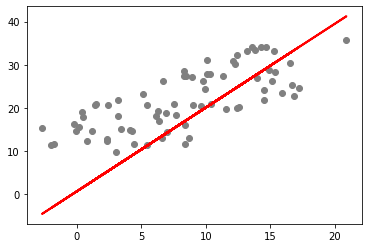

381


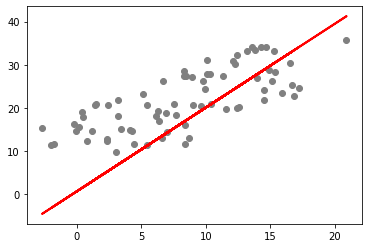

382


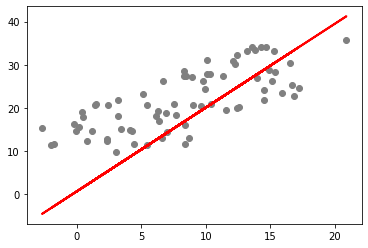

383


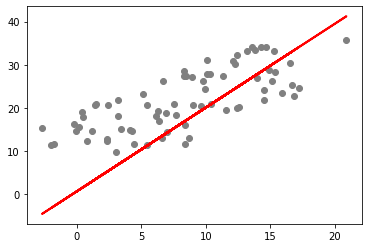

384


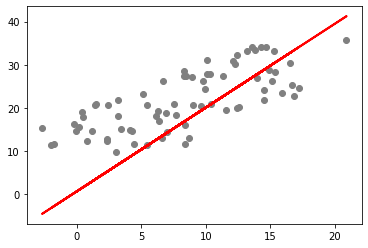

385


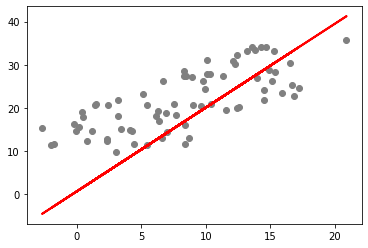

386


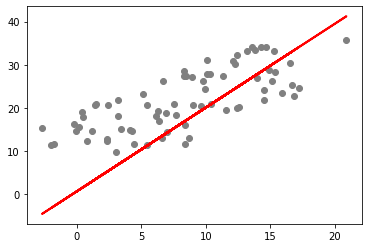

387


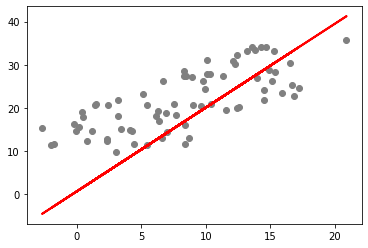

388


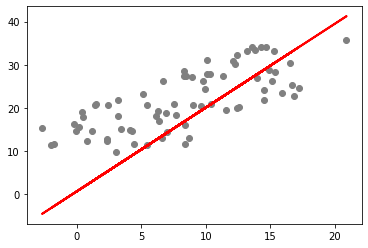

389


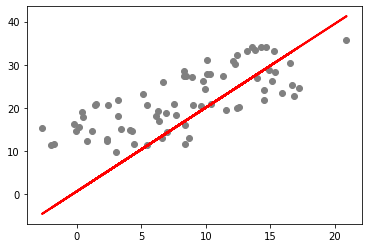

390


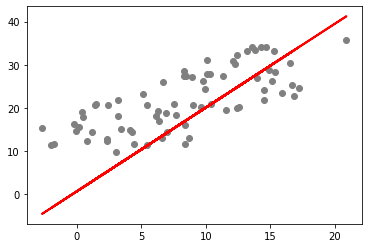

391


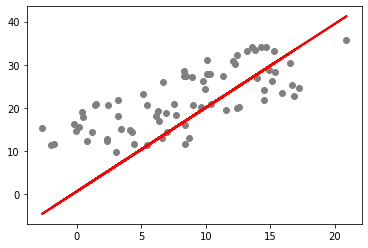

392


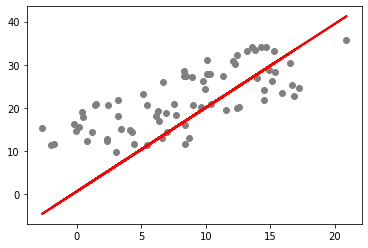

393


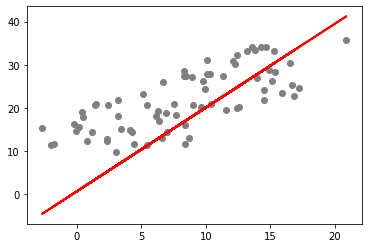

394


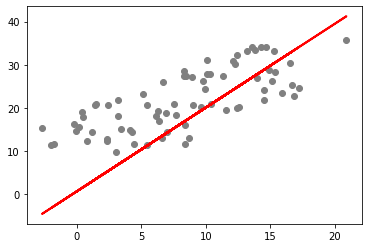

395


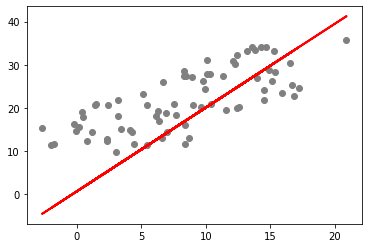

396


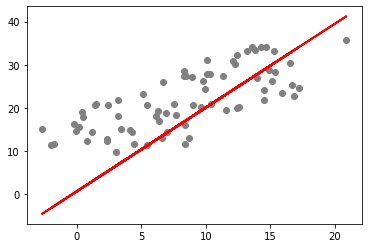

397


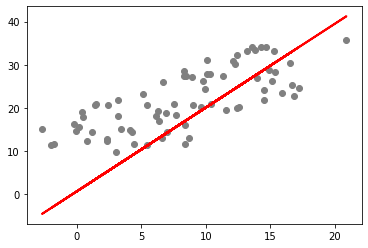

398


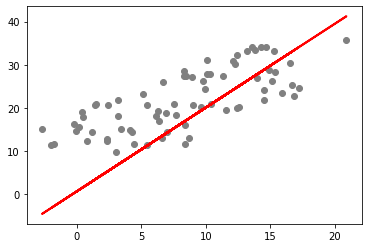

399


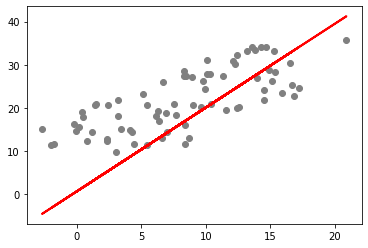

400


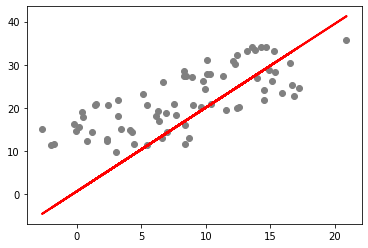

401


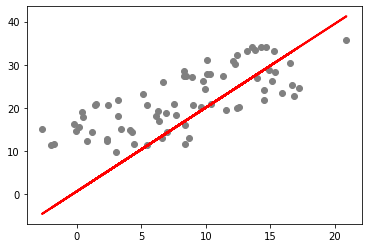

402


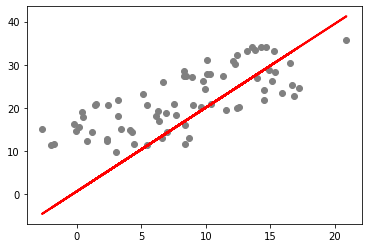

403


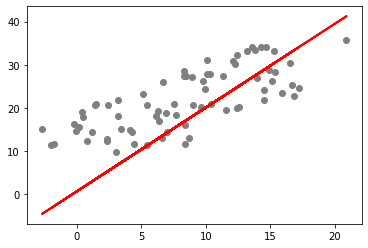

404


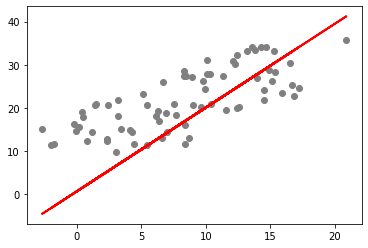

405


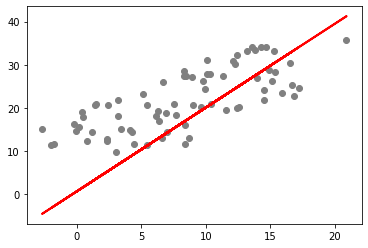

406


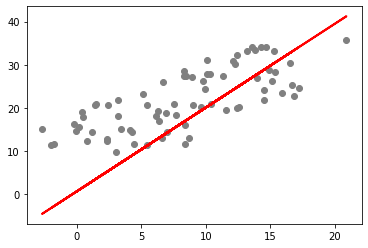

407


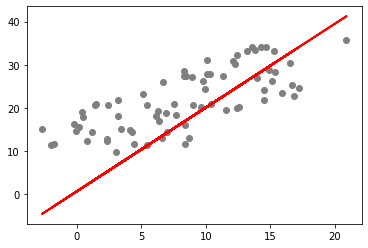

408


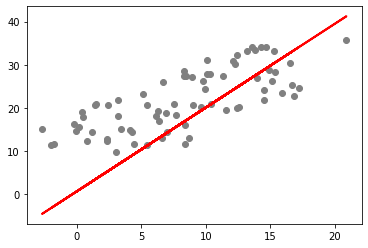

409


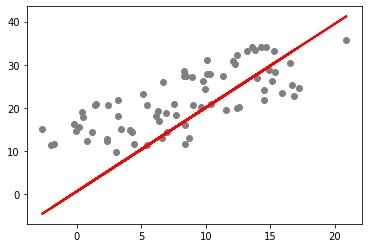

410


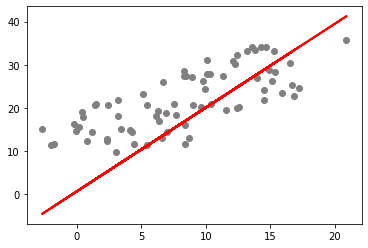

411


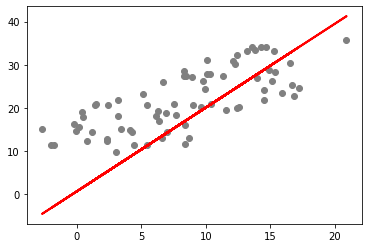

412


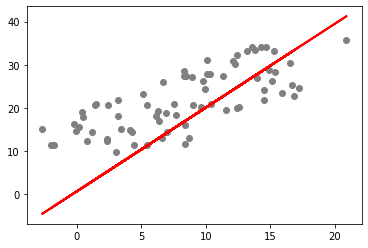

413


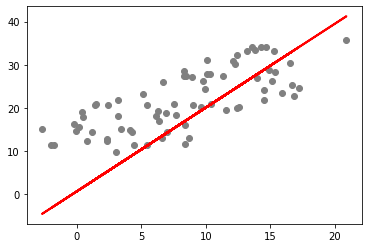

414


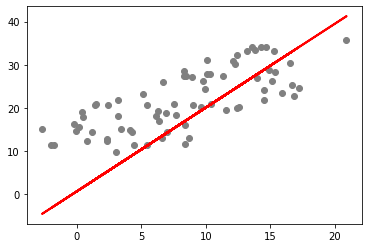

415


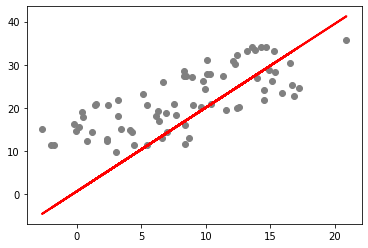

416


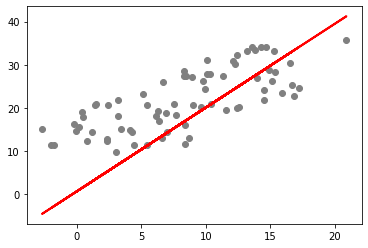

417


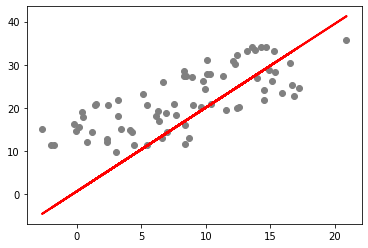

418


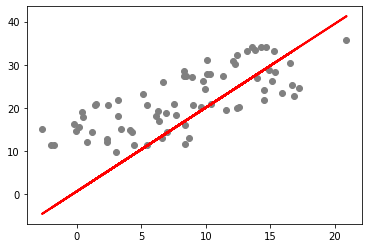

419


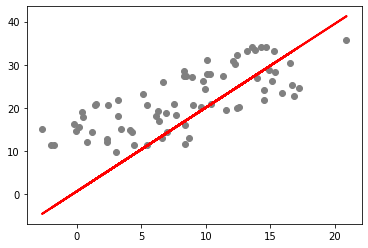

420


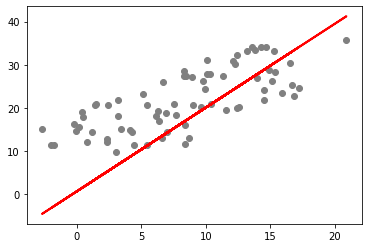

421


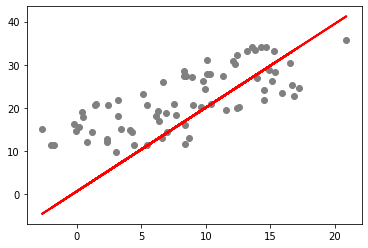

422


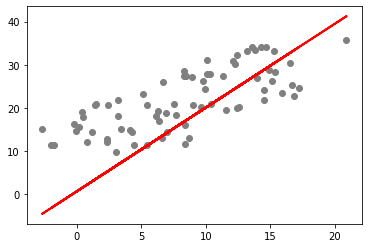

423


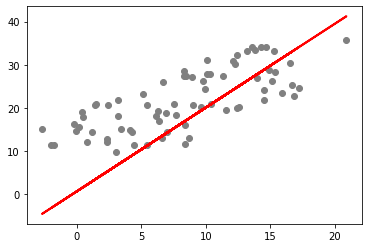

424


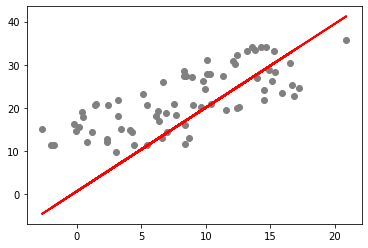

425


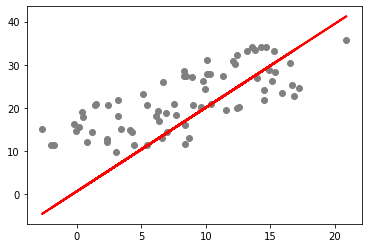

426


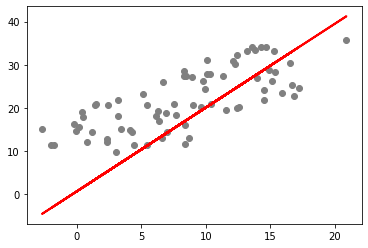

427


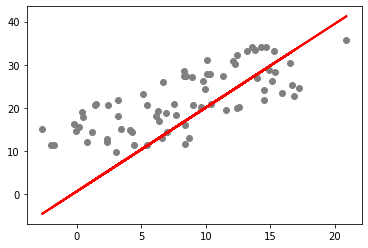

428


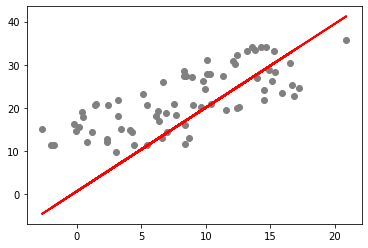

429


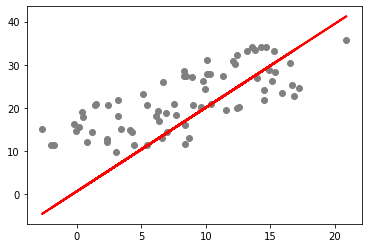

430


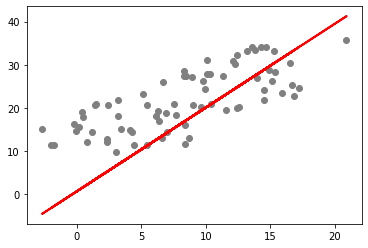

431


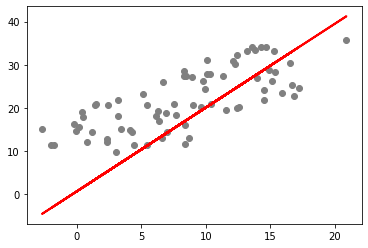

432


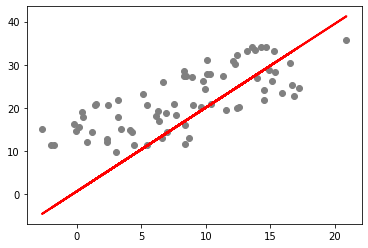

433


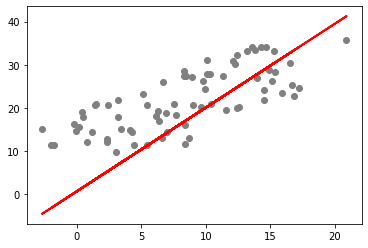

434


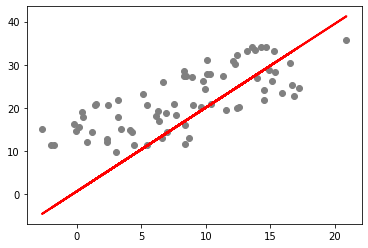

435


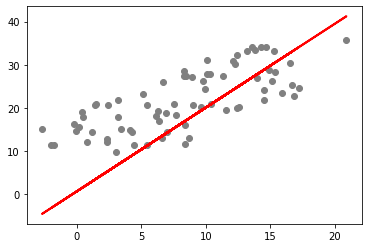

436


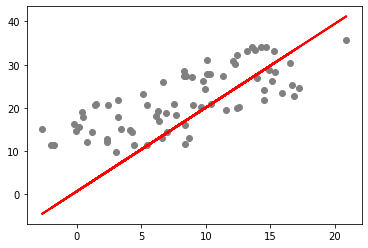

437


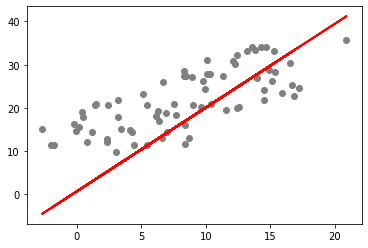

438


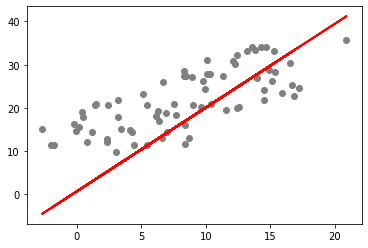

439


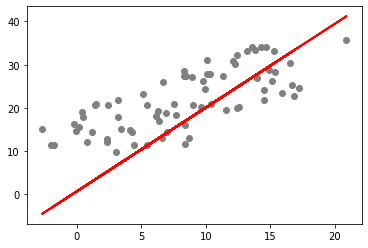

440


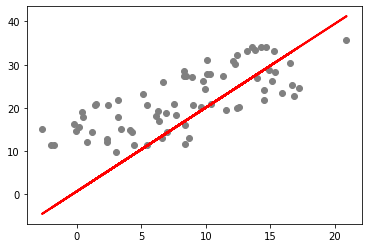

441


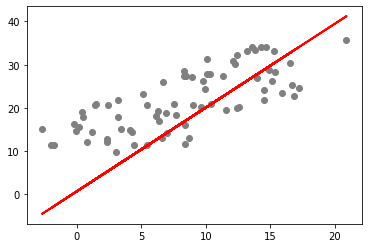

442


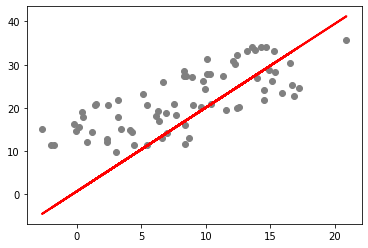

443


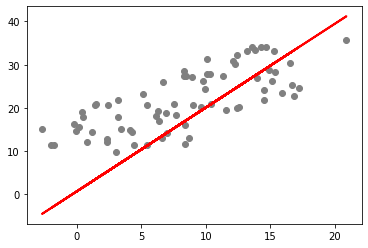

444


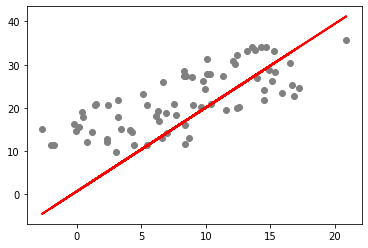

445


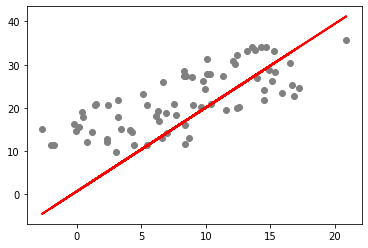

446


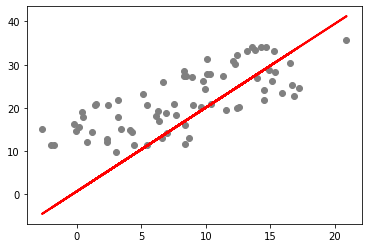

447


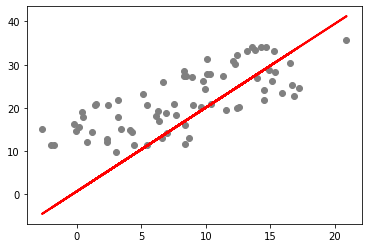

448


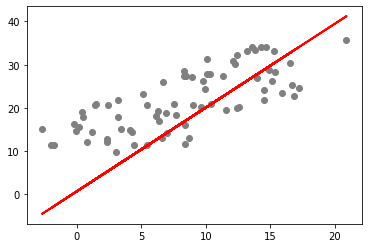

449


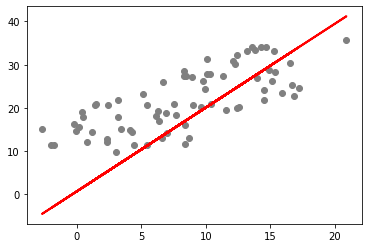

450


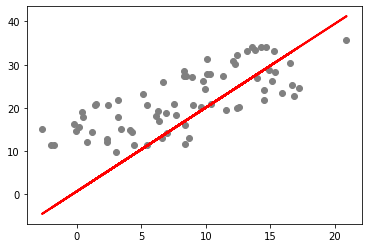

451


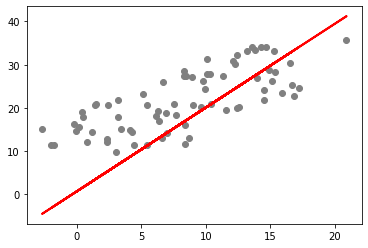

452


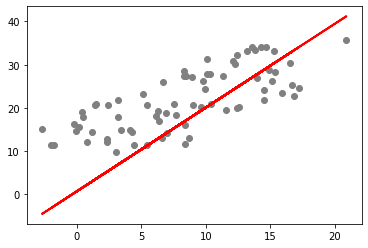

453


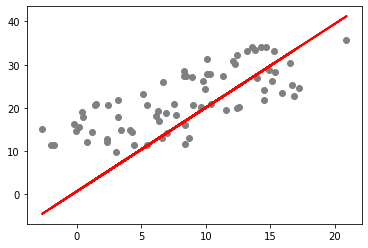

454


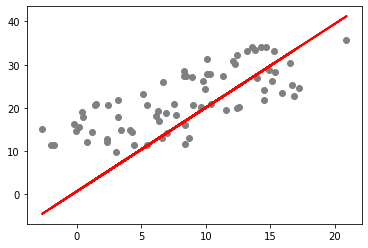

455


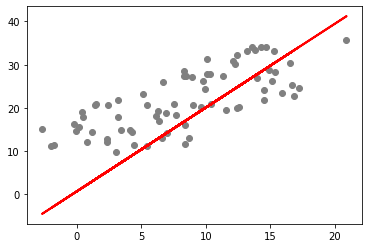

456


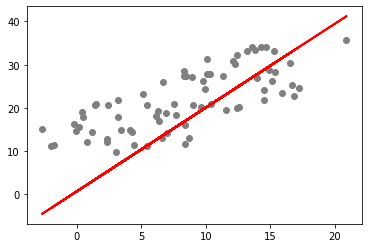

457


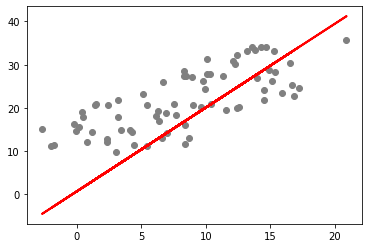

458


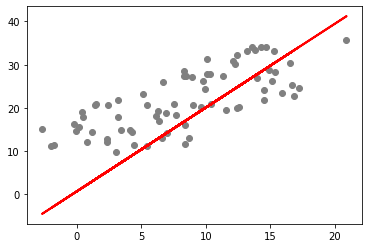

459


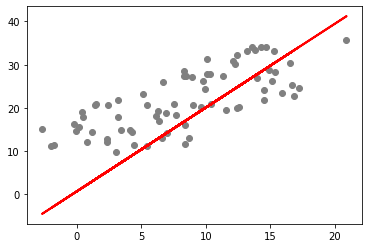

460


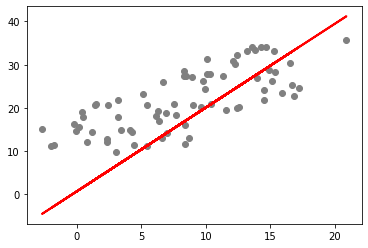

461


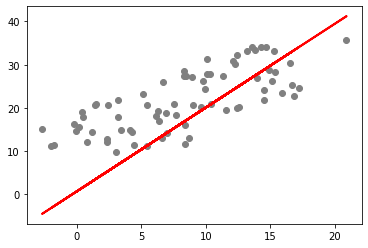

462


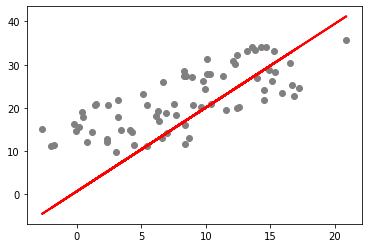

463


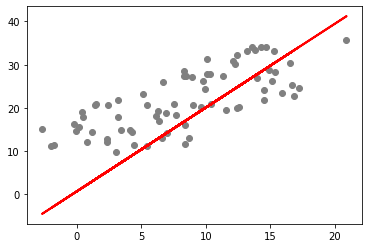

464


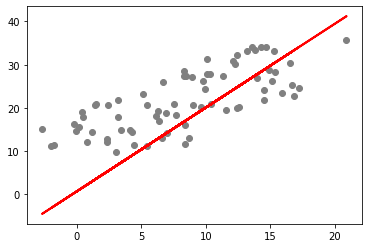

465


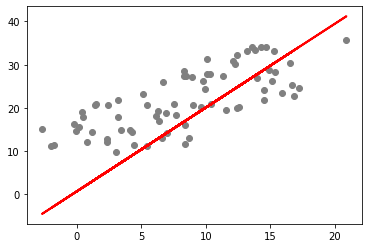

466


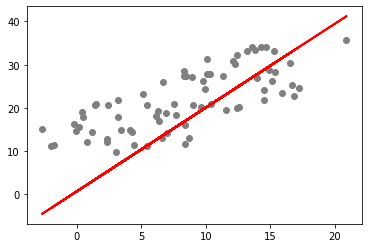

467


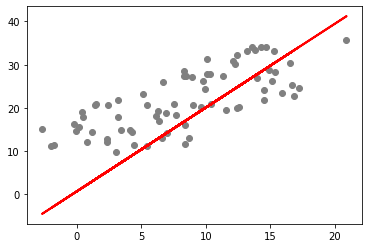

468


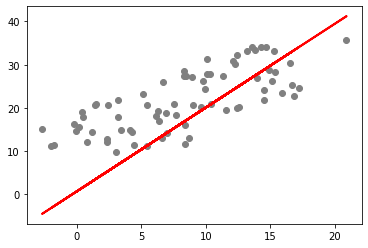

469


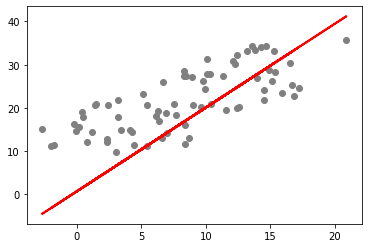

470


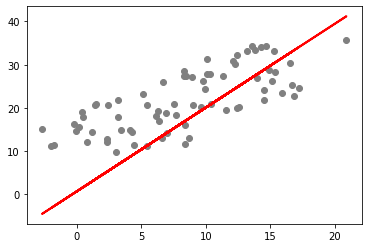

471


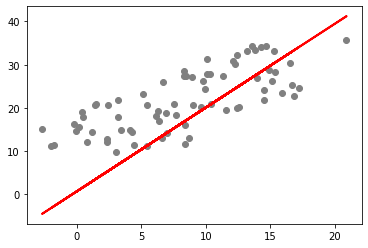

472


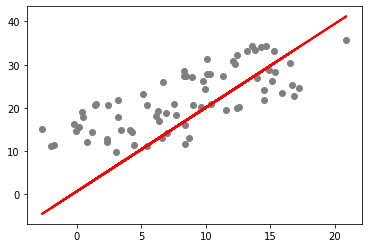

473


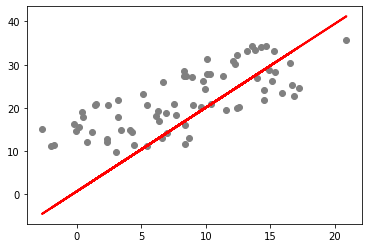

474


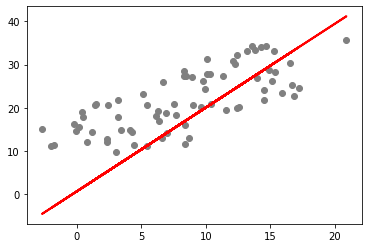

475


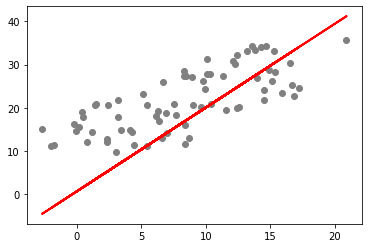

476


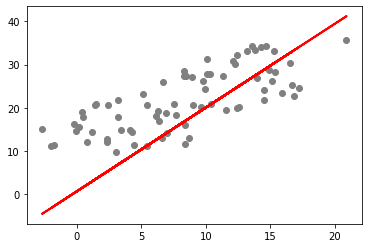

477


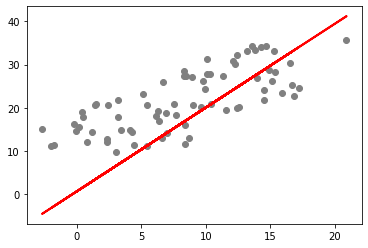

478


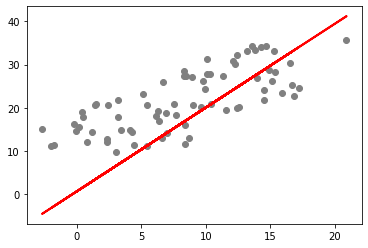

479


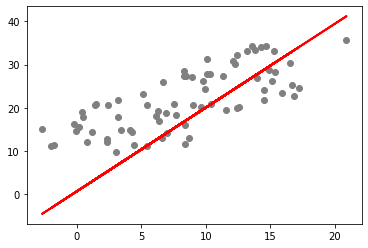

480


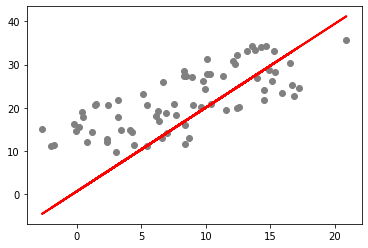

481


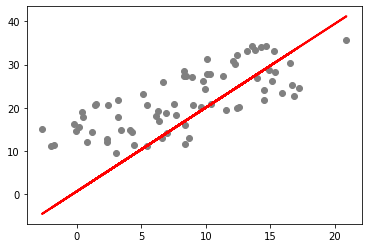

482


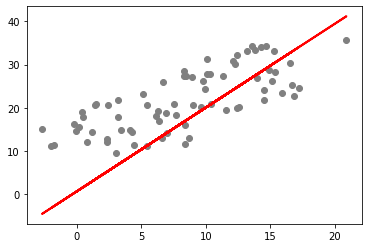

483


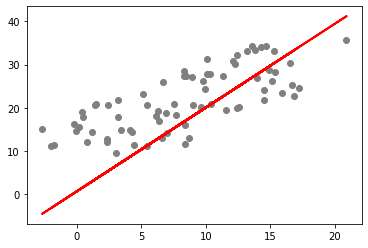

484


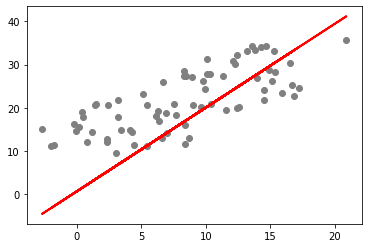

485


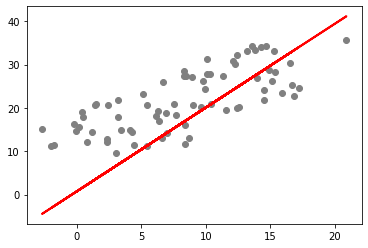

486


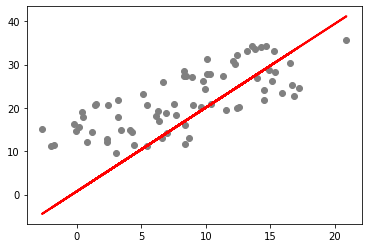

487


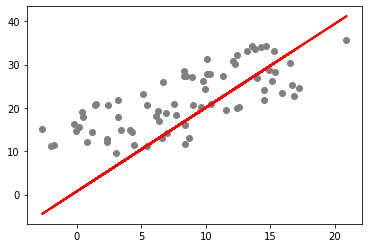

488


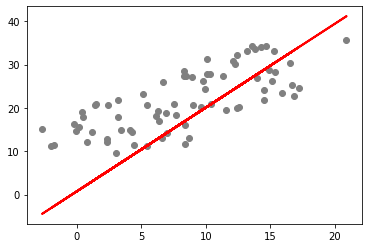

489


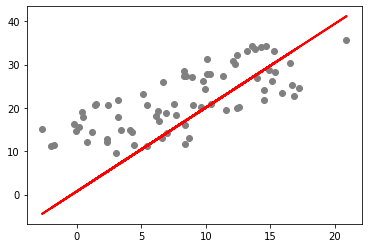

490


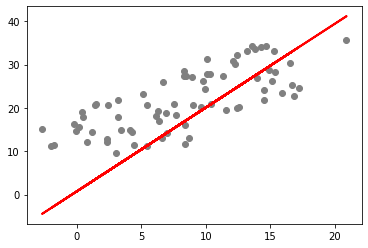

491


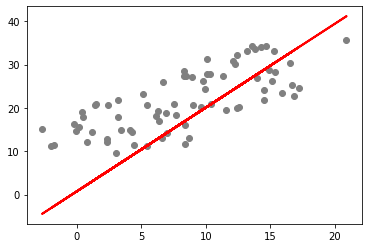

492


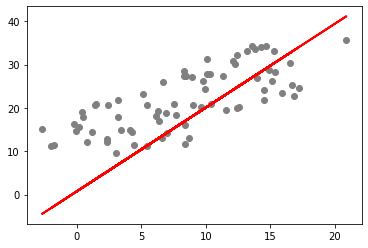

493


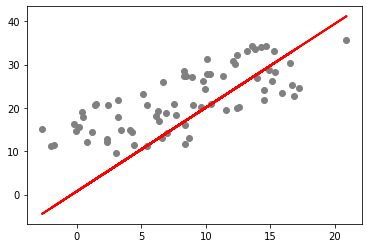

494


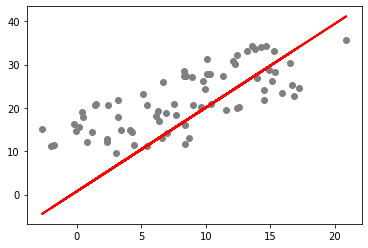

495


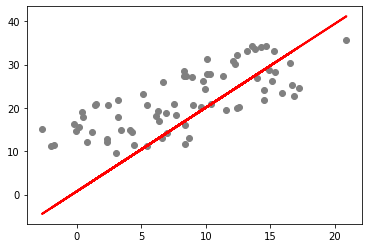

496


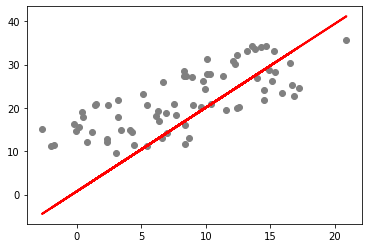

497


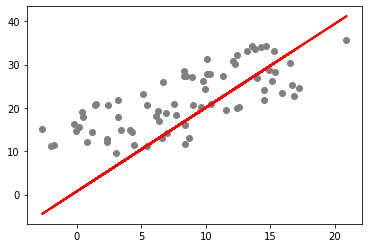

498


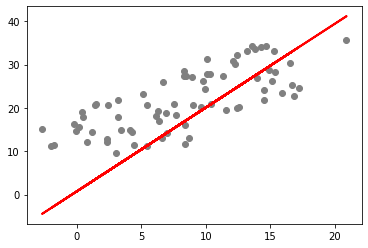

499


In [ ]:
a=0
for k in range(500):
  i = wb[k][0]
  j = wb[k][1]
  y_pred = [predict(p, i, j) for p in x_test] 

  plt.scatter(x_test, y_test,  color='gray')
  plt.plot(x_test, y_pred, color='red', linewidth=2)
  plt.show()
  print(a)
  a=a+1

In [ ]:
def rmse(y_true,y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true),axis=-1))# สร้างfunction rmse

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_dim=1,kernel_initializer='random_uniform',activation='linear'))
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
SGD = tf.keras.optimizers.SGD
sgd = SGD(lr=0.001)

model.compile(loss='mse',optimizer=sgd,metrics=['mae','mse',rmse])

In [ ]:
%time
history=model.fit(x_train,y_train,epochs=1000,batch_size=1,verbose=1,validation_data=(x_test,y_test))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.5 µs
Train on 292 samples, validate on 74 samples
Epoch 1/1000
292/292 [==============================] - 1s 4ms/sample - loss: 19.9612 - mae: 3.5759 - mse: 19.9612 - rmse: 3.5759 - val_loss: 22.3154 - val_mae: 4.0950 - val_mse: 22.3153 - val_rmse: 4.0950
Epoch 2/1000
292/292 [==============================] - 1s 4ms/sample - loss: 21.3246 - mae: 3.7169 - mse: 21.3246 - rmse: 3.7169 - val_loss: 22.3177 - val_mae: 4.0950 - val_mse: 22.3177 - val_rmse: 4.0950
Epoch 3/1000
292/292 [==============================] - 1s 4ms/sample - loss: 20.6656 - mae: 3.6694 - mse: 20.6656 - rmse: 3.6694 - val_loss: 22.3143 - val_mae: 4.0945 - val_mse: 22.3143 - val_rmse: 4.0945
Epoch 4/1000
292/292 [==============================] - 0s 1ms/sample - loss: 22.2576 - mae: 3.8277 - mse: 22.2576 - rmse: 3.8277 - val_loss: 22.4334 - val_mae: 4.1094 - val_mse: 22.4334 - val_rmse: 4.1094
Epoch 5/1000
292/292 [==============================] - 0s 1ms/samp

In [ ]:
h1 = go.Scatter(y=history.history['loss'],mode="lines",line=dict(width=2,color='blue'),name='loss')
h2=go.Scatter(y=history.history['val_loss'],mode="lines",line=dict(width=2,color='green'),name='val_loss')
data=[h1,h2]
layout1=go.Layout(title='Loss',xaxis=dict(title='epochs'),yaxis=dict(title=' '))
fig1=go.Figure(data,layout=layout1)
plotly.offline.iplot(fig1)

In [ ]:
y_pred=model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



In [ ]:
y_pred=y_pred.flatten()

df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head(10)

Actual  Predicted
0    20.6   4.988810
1    26.2  29.646933
2    20.3  19.747686
3    31.2  20.647617
4    16.9  13.988123
5    27.4  22.807453
6    23.4  31.086821
7    15.5   2.828974
8    14.5   4.628837
9    21.8  28.567013

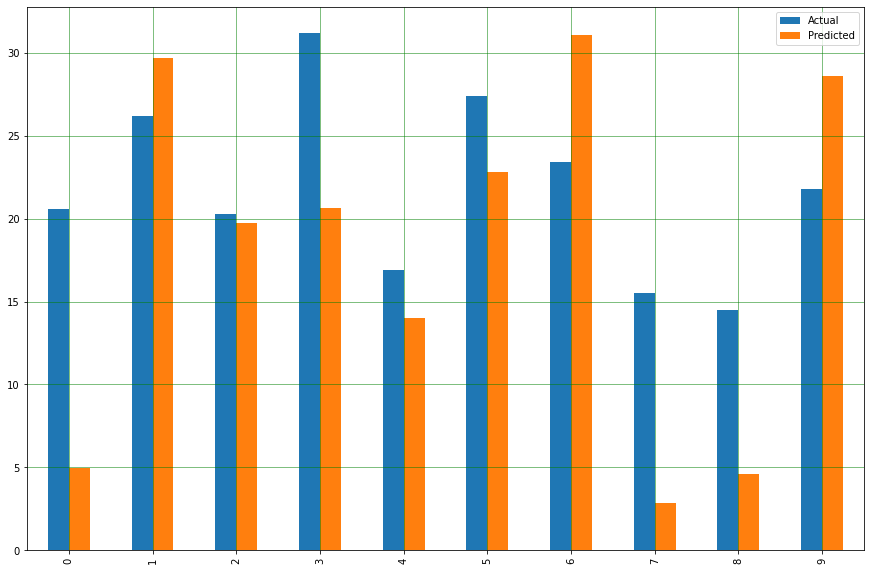

In [ ]:
df1 = df.head(10)
df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major',linestyle="-",linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=":",linewidth='0.5',color='red')
plt.savefig('actual-predict2.jpeg',dpi=300)

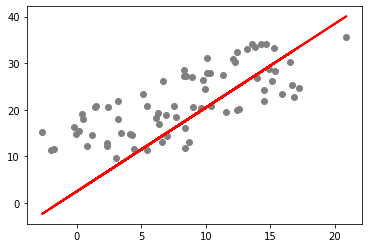

In [ ]:
plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.savefig('keras_500_model.jpeg',dpi=300)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.8526442843514515
Mean Squared Error: 65.7105448234752
Root Mean Squared Error: 8.106204094610202
